In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys, os, logging, timeit, glob
from pathlib import Path as Pathlb


from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import itertools

import seaborn as sns


from statannot import add_stat_annotation

In [22]:
i = pd.DataFrame([[1,2,3],[4,6,5],[7,8,9]])
ii = i.sample(frac=.2, replace=False)
ii

,0,1,2
1,4,6,5


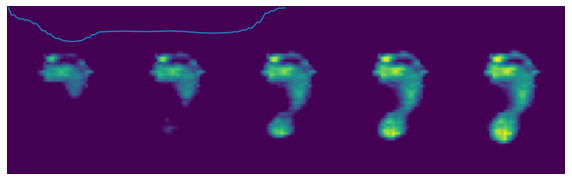

In [18]:

from MLPackage import config as cfg
    
image_features = np.load(r"C:\Project\master-project\Datasets\Casia-D\casia_image_feature.npy")

image_features = image_features[1,...]
image_features.shape

total_image = image_features[...,5]
for i in range(6,10):
    total_image = np.concatenate((total_image, image_features[...,i]), axis=1)
plt.figure(figsize=(10,20))
plt.imshow(total_image)
plt.axis('off')

image_features = np.load(r"C:\Project\master-project\Datasets\Casia-D\Data-barefoot.npy")
Footprint3D = image_features[1,...]
GRF = list()
    

for frame in range(Footprint3D.shape[2]):
    temp = Footprint3D[:, :, frame].sum()
    GRF.append(temp)
GRF = [GRF[i]/1000 for i in range(len(GRF))]
plt.plot(GRF)




In [698]:
from scipy import ndimage
from MLPackage import Butterworth

ML = list()
AP = list()

for i in range(Footprint3D.shape[2]):
    temp = Footprint3D[:, :, i]
    temp2 = ndimage.measurements.center_of_mass(temp)
    ML.append(temp2[1])
    AP.append(temp2[0])

lowpass = Butterworth.Butterworthfilter(mode= "lowpass", fs = 100, cutoff = 5, order = 4)
ML = lowpass.filter(ML)
AP = lowpass.filter(AP)

ML_f = ML - np.mean(ML)
AP_f = AP - np.mean(AP)

a = ML_f ** 2
b = AP_f ** 2
RD_f = np.sqrt(a + b)

COPTS = np.stack((RD_f, AP_f, ML_f), axis = 0)


Text(0.5, 1.0, 'GFR')

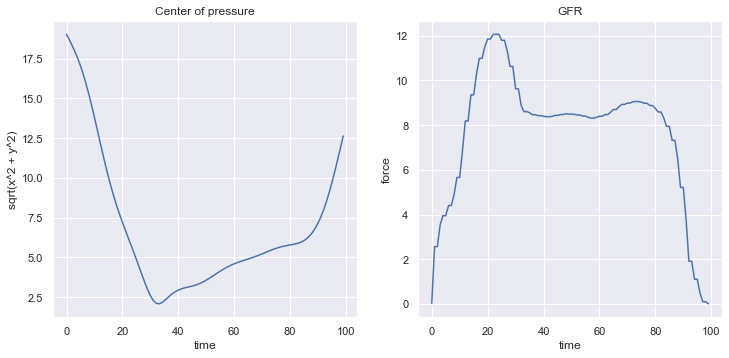

In [721]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.plot(RD_f)
plt.xlabel("time")
plt.ylabel("sqrt(x^2 + y^2)")
plt.title("Center of pressure")

plt.subplot(2,2,2)
plt.plot(GRF)
plt.xlabel("time")
plt.ylabel("force")
plt.title("GFR")

# plt.subplot(2,2,(3,4))
# plt.imshow(total_image)
# plt.axis('off')

In [651]:
e = pd.read_excel(r"C:\Project\master-project\results\Result.xlsx")
e.drop("Unnamed: 0",  axis=1, inplace=True)



0.6060606060606061
0.010101010101010102


,mean(EER),t_idx,mean(acc),mean(f1),ACC%,BACC%,FAR(FPR),FRR(FNR),CM,# positive samples training,# positive samples test,# negative samples test,len(FAR),len(FRR),FAR_0
20,0.000000,60,50.000000,0.000000,97.819315,49.683544,0.006329,1.000000,[[314 2]\n [ 5 0]],5,5,316,100,100,1
260,0.028481,1,90.500000,90.649214,92.638037,91.360759,0.072785,0.100000,[[293 23]\n [ 1 9]],5,10,316,100,100,1
320,0.018987,1,94.133333,94.179718,95.166163,94.293249,0.047468,0.066667,[[301 15]\n [ 1 14]],5,15,316,100,100,1
380,0.028481,1,94.400000,94.485830,93.452381,94.177215,0.066456,0.050000,[[295 21]\n [ 1 19]],5,20,316,100,100,1


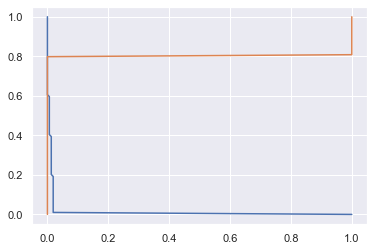

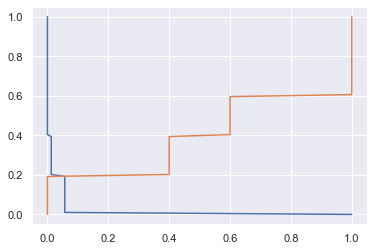

In [641]:
df_all = e[e["subject ID"]==4]
df_all = df_all[df_all["# positive samples training"]==5]
df_all = df_all[df_all["clasifier"]=="KNN"]
plt.plot(df_all.iloc[0,24:124], np.linspace(0, 1, 100))
plt.plot(df_all.iloc[0,124:225], np.linspace(0, 1, 100))
plt.figure()
plt.plot(df_all.iloc[3,24:124], np.linspace(0, 1, 100))
plt.plot(df_all.iloc[3,124:225], np.linspace(0, 1, 100))
ff = np.linspace(0, 1, 100)
print(ff[60])
print(ff[1])
df_all.iloc[:,10:25]


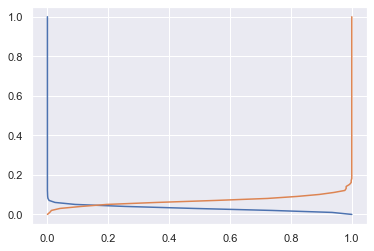

In [65]:
df_all = e[e["feature_type"]=="all"]
# df_all.iloc[:,19:]
df_all = df_all[["clasifier", "test_ratio"]+["FAR_"+str(i) for i in range(100)]+["FRR_"+str(i) for i in range(100)]]
dfg = df_all.groupby(['test_ratio', 'clasifier']).mean()
aa = dfg.xs('Template_Matching', level=1, drop_level=False)
aa = aa.xs(0.3, level=0, drop_level=False).values
plt.plot(aa[0,:100], np.linspace(0, 1, 100))
plt.plot(aa[0,100:], np.linspace(0, 1, 100))
# sns.set()
# dfg.get_group(.1)

Text(0, 0.5, 'BACC%')

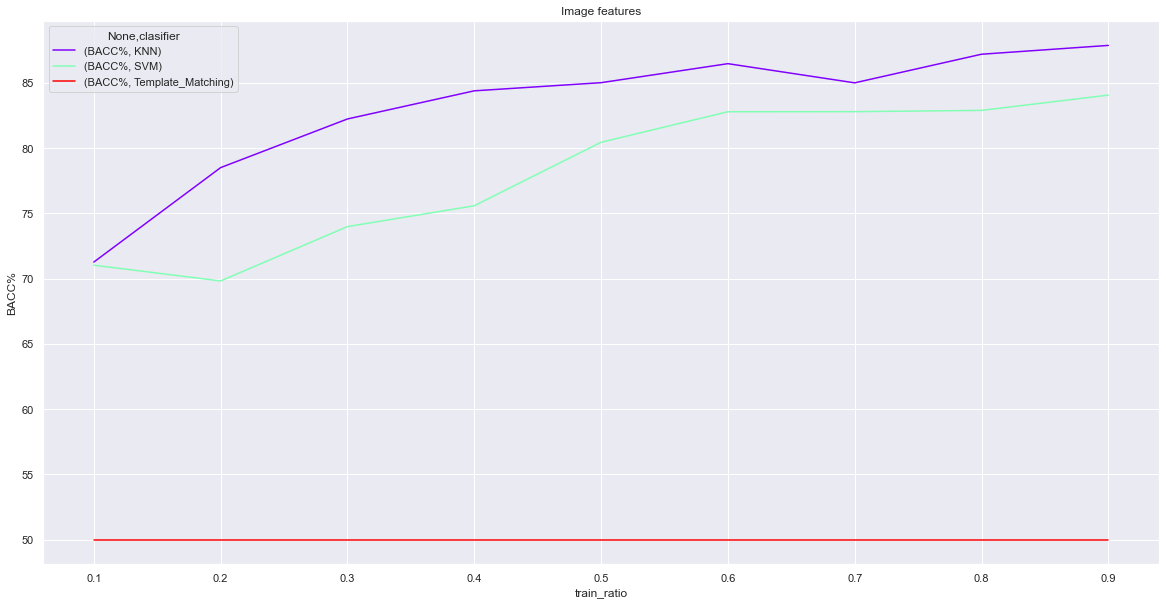

In [18]:
b = "BACC%" # mean(EER)	mean(acc)	mean(f1) $$	ACC%	BACC%	FAR(FPR)	FRR(FNR)
v = "test_ratio"
v = "train_ratio"

df_all = e[e["feature_type"]=="all"]
if v=="test_ratio":
    df_all = df_all[df_all["train_ratio"]==1]
else:
    df_all = df_all[df_all["train_ratio"]!=1]

df_all = df_all[[b, "clasifier", v]]

dfg = df_all.groupby([v, 'clasifier']).mean()
#plot()
# print(dfg)
sns.set()
sns.color_palette("Blues")
dfg.unstack().plot(figsize=(20,10), cmap="rainbow")
plt.title("Image features")
plt.ylabel(b)

In [ ]:
t = "image_P100" # image_P100   PT_deep_P100_mobilenet   PT_deep_P100_efficientnet   PT_deep_P100_resnet50  PT_deep_P100_vgg16
b = "mean(acc)"
c = "KNN"

df_all = e[e["feature_type"]== t]
df_all = df_all[[b, "clasifier", "# positive samples training", "# positive samples test", "test_ratio", "train_ratio"]]
df_all.columns = [b, "clasifier", "samples_training", "samples_test", "test_ratio", "train_ratio"]
df_all["Mode"] = df_all["train_ratio"]
df_all["Mode"] = df_all["Mode"].map(lambda x : "Method A" if x==1 else "Method B")
df_all["Training_Size"] = df_all["Mode"]
df_all["Training_Size"] = df_all.apply(lambda x : str(int((np.round(1-x.test_ratio,decimals=1))*100))+"%" if x.Training_Size=="Method A" else str(int(x.train_ratio*100))+"%", axis=1)
df_all = df_all[[b, "clasifier", "samples_training", "samples_test", "Mode","Training_Size"]]
dfg = df_all.groupby(['Mode', 'clasifier', 'Training_Size']).mean()
df_all["Training_Size"].unique()
# if v=="test_ratio":
#     df_all["a"] = df_all[df_all["train_ratio"]==1]
# else:
#     df_all["a"] = df_all[df_all["train_ratio"]!=1]
# df_all["a"] = 
plt.figure(figsize=(20,20))
plt.subplot(7,1,(1,5))
# ax1 = plt.plot(dfg[b].unstack().T, marker="o")
ax1 = plt.plot(dfg[b].unstack()[np.in1d(dfg[b].unstack().index.get_level_values(1), ['KNN'])].T, marker="o")
plt.legend(dfg[b].unstack()[np.in1d(dfg[b].unstack().index.get_level_values(1), ['KNN'])].index,
            loc="best", title='Labels', prop={'size': 12})
plt.ylabel(b)
plt.title("The second pipeline")
plt.tick_params(labelbottom=False)



plt.subplot(7,1,6)
dfg["samples_test"]["Method A"]["KNN"].plot(label="# test sample", marker="o")
for x,y in zip([0,1,2,3,4,5,6,7,8],np.round(dfg["samples_test"]["Method A"]["KNN"].values, decimals=1)):
    label = f"{y}"
    plt.annotate(f"{y}", # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
dfg["samples_training"]["Method A"]["KNN"].plot(label="# training sample", marker="^")
for x,y in zip([0,1,2,3,4,5,6,7,8],np.round(dfg["samples_training"]["Method A"]["KNN"].values, decimals=1)):
    label = f"{y}"
    plt.annotate(f"{y}", # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.ylabel("Method A\n # samples")
plt.xlabel("")
plt.legend(loc="best", title='Labels', prop={'size': 12})

plt.tick_params(labelbottom=False)
# plt.xticks(ticks=[0,1,2,3,4,5,6,7,8], labels=[ str(i[0])+"-("+str(i[1])+")" for i in zip(np.round(dfg["samples_training"]["Method A"]["KNN"].values, decimals=2), np.round(dfg["samples_test"]["Method A"]["KNN"].values, decimals=2))])

# plt.tick_params(labeltop=True)
# plt.xticks(ticks=[0,1,2,3,4,5,6,7,8], labels=[ str(i[0])+"-("+str(i[1])+")" for i in zip(np.round(dfg["samples_training"]["Method B"]["KNN"].values, decimals=2), np.round(dfg["samples_test"]["Method B"]["KNN"].values, decimals=2))])

plt.subplot(7,1,7)
dfg["samples_test"]["Method B"]["KNN"].plot(label="# test sample", marker="o")
dfg["samples_training"]["Method B"]["KNN"].plot(label="# training sample", marker="^")

plt.ylabel("Method B\n # samples")
plt.legend(loc="best", title='Labels', prop={'size': 12})
x=0
y=4.6
label = f"{y}"
plt.annotate(f"{y}", # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,5), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
for x,y in zip([0,1,2,3,4,5,6,7,8],np.round(dfg["samples_training"]["Method B"]["KNN"].values, decimals=1)):
    label = f"{y}"
    plt.annotate(f"{y}", # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [59]:
e = pd.read_excel(f'C:\\Project\\master-project\\results\\samples.xlsx')
e.iloc[:,15:]

,feature_type,test_ratio,training_mode,EER,TH,ACC_bd,BACC_bd,CM_bd,FAR_bd,FRR_bd,...,pos_te_samples,neg_te_samples,ACC_ud,BACC_ud,CM_ud,FAR_ud,FRR_ud,known_imposter,unknown_imposter,unknown_imposter_samples
0,all,3,balanced,0.000000,1.000000,97.333333,97.333333,[[71 4]\n [ 0 75]],0.053333,0.000000,...,3,1364,92.392099,96.187683,[[1260 104]\n [ 0 3]],0.076246,0.000000,60,0,0
1,all,3,balanced,0.000000,1.000000,63.333333,63.333333,[[70 5]\n [50 25]],0.066667,0.666667,...,3,1346,91.994070,62.729074,[[1240 106]\n [ 2 1]],0.078752,0.666667,60,0,0
2,all,3,balanced,0.000000,1.000000,75.333333,75.333333,[[63 12]\n [25 50]],0.160000,0.333333,...,3,1347,90.666667,78.693393,[[1222 125]\n [ 1 2]],0.092799,0.333333,60,0,0
3,all,3,balanced,0.000000,1.000000,82.000000,82.000000,[[73 2]\n [25 50]],0.026667,0.333333,...,3,1364,96.927579,81.830401,[[1323 41]\n [ 1 2]],0.030059,0.333333,60,0,0
4,all,3,balanced,0.000000,1.000000,73.333333,73.333333,[[60 15]\n [25 50]],0.200000,0.333333,...,3,1364,83.833211,75.268817,[[1144 220]\n [ 1 2]],0.161290,0.333333,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,all,3,balanced,0.030813,0.323232,90.666667,90.666667,[[61 14]\n [ 0 75]],0.186667,0.000000,...,3,1364,86.759327,93.365103,[[1183 181]\n [ 0 3]],0.132698,0.000000,60,0,0
5396,all,3,balanced,0.004220,0.323232,96.000000,96.000000,[[69 6]\n [ 0 75]],0.080000,0.000000,...,3,1364,96.634967,98.313783,[[1318 46]\n [ 0 3]],0.033724,0.000000,60,0,0
5397,all,3,balanced,0.015198,0.323232,99.333333,99.333333,[[74 1]\n [ 0 75]],0.013333,0.000000,...,3,1364,93.782004,96.884164,[[1279 85]\n [ 0 3]],0.062317,0.000000,60,0,0
5398,all,3,balanced,0.015956,0.323232,78.666667,78.666667,[[68 7]\n [25 50]],0.093333,0.333333,...,3,1364,91.221653,78.971163,[[1245 119]\n [ 1 2]],0.087243,0.333333,60,0,0


In [60]:
e.iloc[:,15:]

,BACC_bd,CM_bd,FAR_bd,FRR_bd,pos_tr_samples,neg_tr_ratio,pos_te_samples,neg_te_samples,ACC_ud,BACC_ud,CM_ud,FAR_ud,FRR_ud,known_imposter,unknown_imposter,unknown_imposter_samples
0,97.333333,[[71 4]\n [ 0 75]],0.053333,0.000000,3,10,3,1364,92.392099,96.187683,[[1260 104]\n [ 0 3]],0.076246,0.000000,60,0,0
1,63.333333,[[70 5]\n [50 25]],0.066667,0.666667,3,10,3,1346,91.994070,62.729074,[[1240 106]\n [ 2 1]],0.078752,0.666667,60,0,0
2,75.333333,[[63 12]\n [25 50]],0.160000,0.333333,3,10,3,1347,90.666667,78.693393,[[1222 125]\n [ 1 2]],0.092799,0.333333,60,0,0
3,82.000000,[[73 2]\n [25 50]],0.026667,0.333333,3,10,3,1364,96.927579,81.830401,[[1323 41]\n [ 1 2]],0.030059,0.333333,60,0,0
4,73.333333,[[60 15]\n [25 50]],0.200000,0.333333,3,10,3,1364,83.833211,75.268817,[[1144 220]\n [ 1 2]],0.161290,0.333333,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,90.666667,[[61 14]\n [ 0 75]],0.186667,0.000000,27,10,3,1364,86.759327,93.365103,[[1183 181]\n [ 0 3]],0.132698,0.000000,60,0,0
5396,96.000000,[[69 6]\n [ 0 75]],0.080000,0.000000,27,10,3,1364,96.634967,98.313783,[[1318 46]\n [ 0 3]],0.033724,0.000000,60,0,0
5397,99.333333,[[74 1]\n [ 0 75]],0.013333,0.000000,27,10,3,1364,93.782004,96.884164,[[1279 85]\n [ 0 3]],0.062317,0.000000,60,0,0
5398,78.666667,[[68 7]\n [25 50]],0.093333,0.333333,27,10,3,1364,91.221653,78.971163,[[1245 119]\n [ 1 2]],0.087243,0.333333,60,0,0


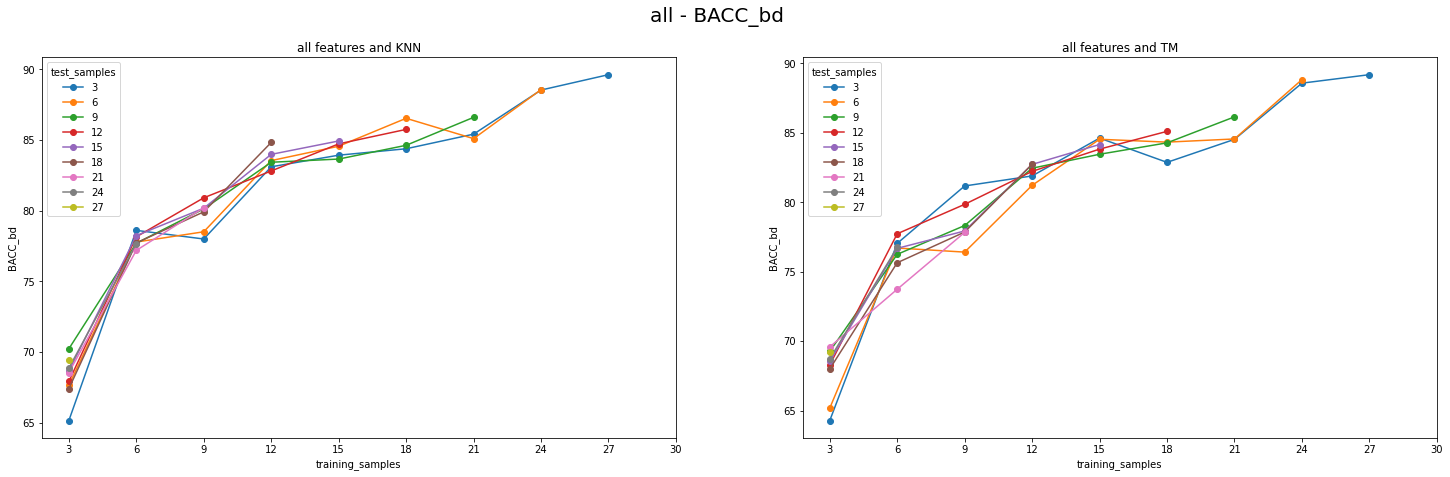

In [66]:
t = "all" # image_P100   PT_deep_P100_mobilenet   PT_deep_P100_efficientnet   PT_deep_P100_resnet50  PT_deep_P100_vgg16
b = "mean(acc)"
c = "KNN"


i=0
for z, t in enumerate(["all"]):#  "all", "image_P100", "PT_deep_P100_resnet50"
    df_all = e[e["feature_type"]== t]

    for x, b in enumerate(["BACC_bd",]):#  "ACC%",  "BACC%",  "mean(EER)",  "FAR(FPR)",  "FRR(FNR)"
        plt.figure(figsize=(25,7)).suptitle(t+" - "+b, fontsize=20)
        
        df_all = df_all[[b, "clasifier", "pos_tr_samples", "pos_te_samples"]]
        df_all.columns = [b, "clasifier", "training_samples", "test_samples"]
        a2 = 'test_samples'
        a1 = 'training_samples'
        v=[40,100]
        C = df_all.groupby(['clasifier', a1, a2]).mean()
        for y,c in enumerate(["KNN", "TM"]):
            
            plt.subplot(1,2,y+1)
            plt.title(c)
            i = i+1
            # sns.heatmap(C.unstack().loc[c,b], annot=True, fmt=".2f", vmin=v[0], vmax=v[1])

            labels = [b[1] for b in C.unstack().columns]
            plt.plot(C.unstack().loc[c,b], label=labels, marker='o')
            plt.ylabel(b)
            plt.title(f'{t} features and {c}')
            plt.legend(title=a2)
            plt.xlabel(a1)
            plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])


In [11]:
v=[[85,100],[1,3]]
v[1][1]

3

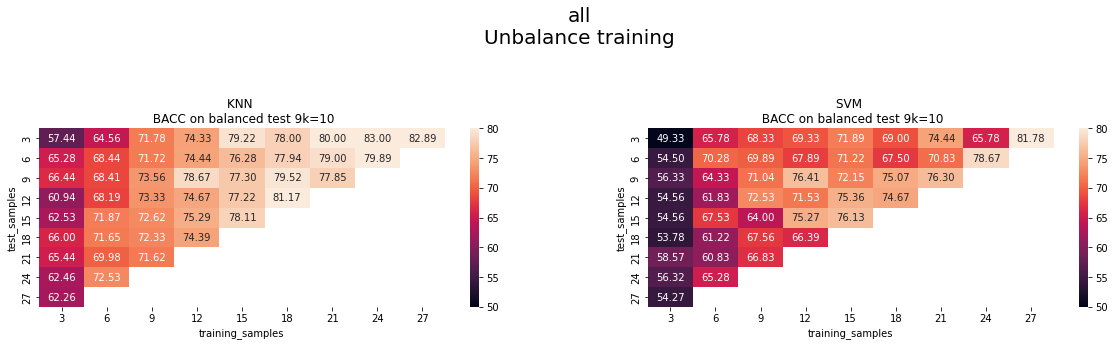

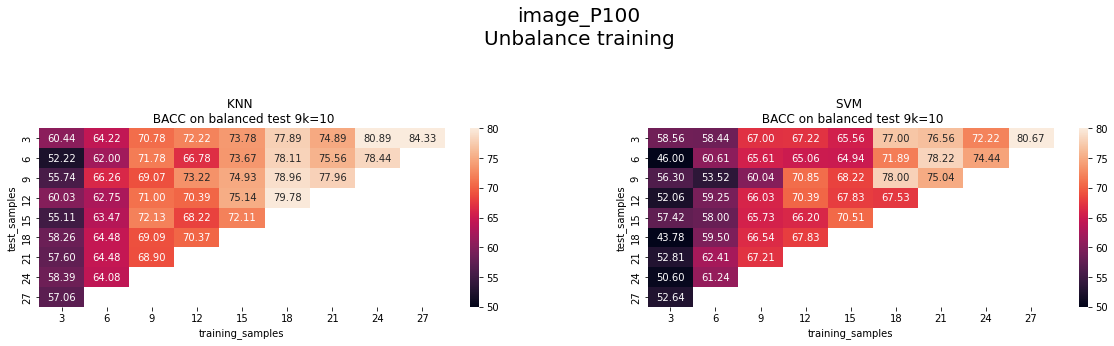

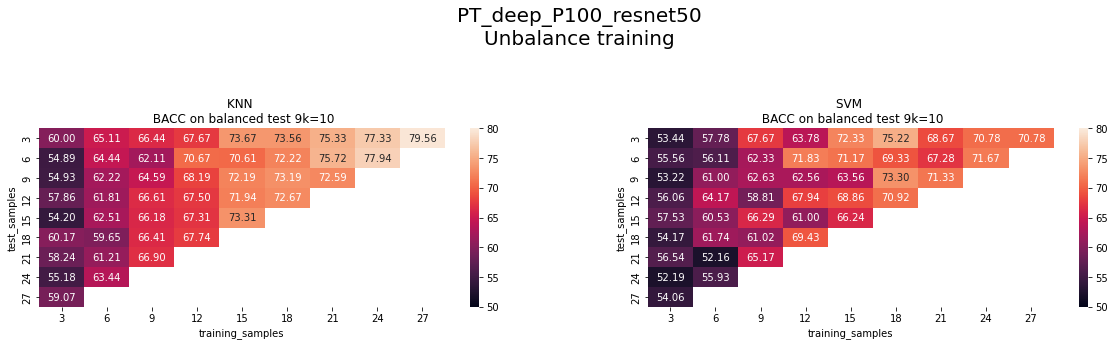

In [56]:
t = "all" # image_P100   PT_deep_P100_mobilenet   PT_deep_P100_efficientnet   PT_deep_P100_resnet50  PT_deep_P100_vgg16
b = "mean(acc)"
c = "KNN"

a1 = 'test_samples'
a2 = 'training_samples'
v=[[50, 80],
   [50, 80],
   [50, 100],]
# e = pd.read_excel(f'C:\\Project\\master-project\\results\\Unbalanced.xlsx')
e = pd.read_excel(f'C:\\Project\\master-project\\results\\Balanced_1.xlsx')


for z, t in enumerate([ "all", "image_P100", "PT_deep_P100_resnet50"]):#  "all", "image_P100", "PT_deep_P100_resnet50"
    i=1
    plt.figure(figsize=(20,13)).suptitle(f"{t}\nUnbalance training", fontsize=20)
    plt.subplots_adjust(hspace=0.4, top=0.85,) 
                    # hspace=0.4)
    for x, b in enumerate(["ACC_bd", ]):#  "ACC%",  "BACC%",  "mean(EER)",  "FAR(FPR)",  "FRR(FNR)"
        df_all = e[e["feature_type"]== t]
        df_all = df_all[[b, "clasifier", "pos_tr_samples", "pos_te_samples"]]
        df_all.columns = [b, "clasifier", "training_samples", "test_samples"]
        
        C = df_all.groupby(['clasifier', a1, a2]).mean()
        for y,c in enumerate(["KNN", "SVM",]):
            
            plt.subplot(3,2,i)
            title = ["BACC on balanced test 9k=10",  "BACC on unbalanced test", "ACC on unbalanced test"]
            plt.title(f"{c} \n {title[x]}")
            i = i+1
            sns.heatmap(C.unstack().loc[c,b], annot=True, fmt=".2f", vmin=v[x][0], vmax=v[x][1])

            # labels = [b[1] for b in C.unstack().columns]
            # plt.plot(C.unstack().loc[c,b], label=labels, marker='o')
            # plt.ylabel(b)
            # plt.title(f"{c} \n {title[x]}")
            # plt.legend(title=a2)
            # plt.xlabel(a1)
            # plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22])
            # plt.xticks(ticks=[3,6,9,12,15,18,21,24,27,30])


<Figure size 1440x720 with 0 Axes>

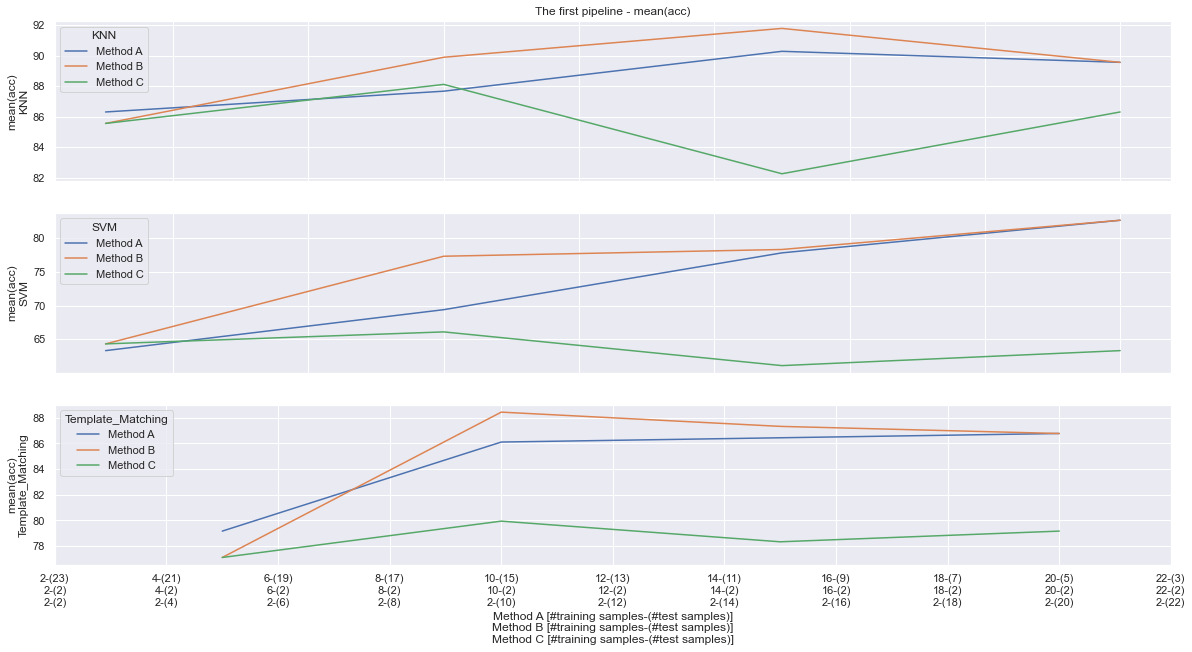

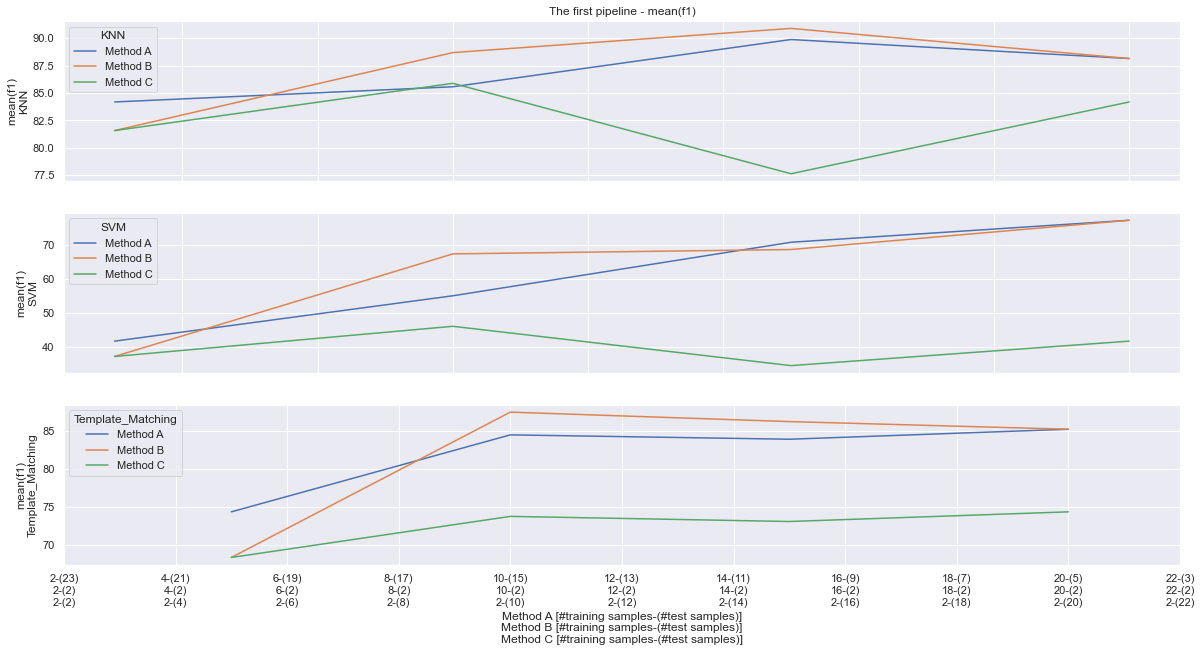

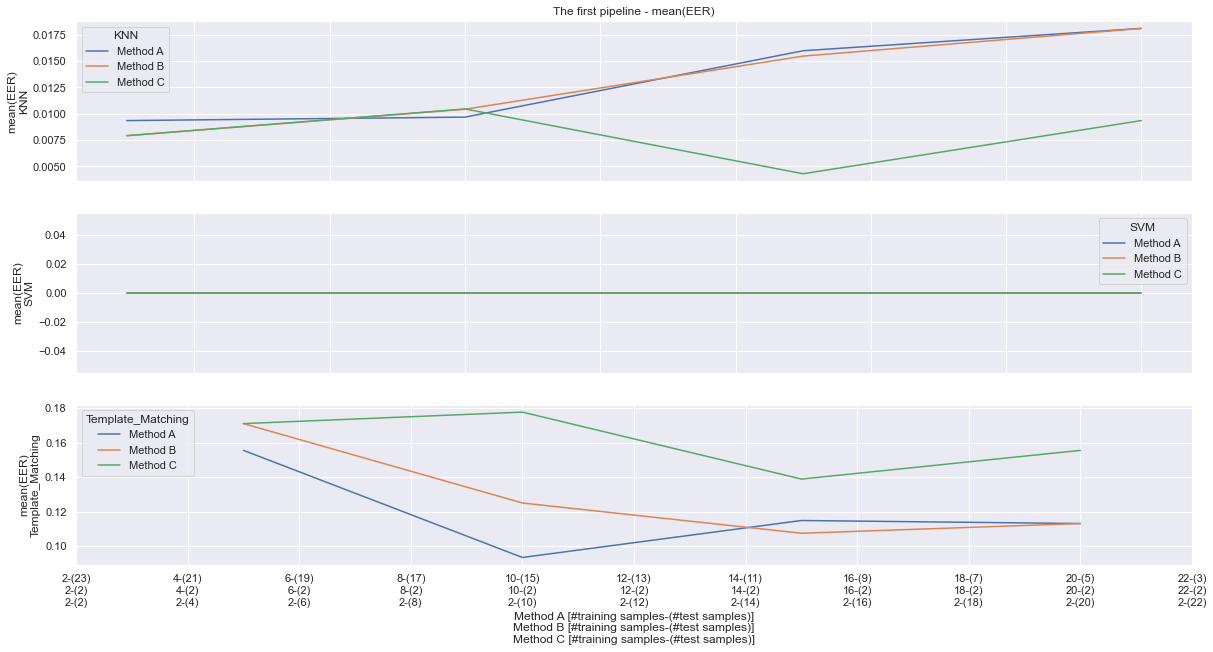

In [770]:
t = "all" # image_P100   PT_deep_P100_mobilenet   PT_deep_P100_efficientnet   PT_deep_P100_resnet50  PT_deep_P100_vgg16
b = "mean(acc)"
c = "KNN"

plt.figure(figsize=(20,10))


for _, b in enumerate(["mean(acc)", "mean(f1)", "mean(EER)"]):
    df_all = e[e["feature_type"]== t]
    df_all = df_all[[b, "clasifier", "# positive samples training", "# positive samples test"]]
    df_all.columns = [b, "clasifier", "samples_training", "samples_test"]
    df_all['s'] = df_all["samples_training"] + df_all["samples_test"]
    df_all1 = df_all[df_all["samples_training"]==5].copy()#.drop(["samples_training"],axis=1)
    # df_all1["m"] = "C"
    df_all2 = df_all[df_all["samples_test"]==5].copy()#.drop(["samples_training"],axis=1)
    # df_all2["m"] = "B"
    df_all3 = df_all[df_all["s"]==25].copy()#.drop(["samples_training"],axis=1)
    # df_all3["m"] = "A"
    a = pd.concat([df_all1,df_all2,df_all3], axis=0).drop(["s"], axis=1)
    plt.figure(figsize=(20,10))

    C = df_all1.drop(["s"],axis=1).groupby(['clasifier', 'samples_test']).mean()
    B = df_all2.drop(["s"],axis=1).groupby(['clasifier', 'samples_training']).mean()
    A = df_all3.drop(["s"],axis=1).groupby(['clasifier', 'samples_training']).mean()

    for idx, c in enumerate(["KNN", "SVM", "Template_Matching"]):
        plt.subplot(3,1,idx+1)
        A.unstack().T.loc[b, c].plot(label="Method A")
        B.unstack().T.loc[b, c].plot(label="Method B")
        C.unstack().T.loc[b, c].plot(label="Method C")
        plt.legend(loc="best", title=c)
        plt.ylabel(b +"\n"+ c)

        # if idx==2:
        
        if idx==2:
            Alabels = [str(i)+"-("+str(25-i)+")" for i in range(2,23,2) ]
            Blabels = [str(i)+"-(2)" for i in range(2,23,2) ]
            Clabels = ["2-("+str(i)+")" for i in range(2,23,2) ]
            L = [i[0]+"\n"+i[1]+"\n"+i[2] for i in zip(Alabels,Blabels,Clabels)]
            plt.xticks(ticks=[2,4,6,8,10,12,14,16,18,20,22], labels=L)
            plt.xlabel("Method A [#training samples-(#test samples)]\nMethod B [#training samples-(#test samples)]\nMethod C [#training samples-(#test samples)]")
        if idx!=2: 
            plt.xlabel("")
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                bottom=False,      # ticks along the bottom edge are off
                labelbottom=False) 

        if idx==0: plt.title("The first pipeline - "+b)

mean(EER)
clasifier         samples_test           
KNN               5              0.036651
                  10             0.034379
                  15             0.034968
                  20             0.035924
SVM               5              0.046311
                  10             0.050000
                  15             0.000000
                  20             0.050000
Template_Matching 5              0.281171
                  10             0.248800
                  15             0.248200
                  20             0.230000

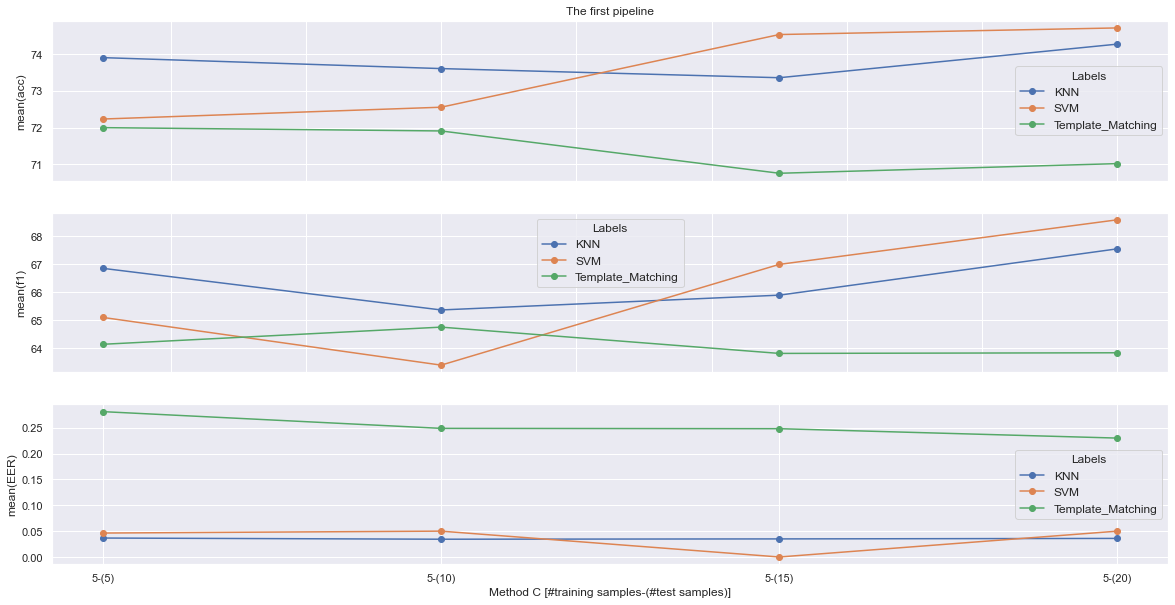

In [512]:
t = "all" # image_P100   PT_deep_P100_mobilenet   PT_deep_P100_efficientnet   PT_deep_P100_resnet50  PT_deep_P100_vgg16
b = "mean(acc)"
c = "KNN"

plt.figure(figsize=(20,10))

for idx, b in enumerate(["mean(acc)", "mean(f1)", "mean(EER)"]):
    df_all = e[e["feature_type"]== t]
    df_all = df_all[[b, "clasifier", "# positive samples training", "# positive samples test"]]
    df_all.columns = [b, "clasifier", "samples_training", "samples_test"]
    df_all1 = df_all[df_all["samples_training"]==5].copy().drop(["samples_training"],axis=1)

    dfg = df_all1.groupby(['clasifier', 'samples_test']).mean()
    plt.subplot(3,1,idx+1)
    plt.plot(dfg[b].unstack().T, marker="o")
    plt.legend(dfg[b].unstack().index,
                    loc="best", title='Labels', prop={'size': 12})
    plt.ylabel(b)

    if idx==2:
        Alabels = ["5-("+str(i)+")" for i in range(5,25,5) ]
        plt.xticks(ticks=[5,10,15,20], labels=Alabels)

        plt.xlabel("Method C [#training samples-(#test samples)]")
    if idx!=2: 
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            bottom=False,      # ticks along the bottom edge are off
            labelbottom=False) 

    if idx==0: plt.title("The first pipeline")



dfg

In [499]:
t = "image_P100" # image_P100   PT_deep_P100_mobilenet   PT_deep_P100_efficientnet   PT_deep_P100_resnet50  PT_deep_P100_vgg16
b = "mean(acc)"
c = "KNN"

for b in ["mean(acc)", "mean(f1)", "mean(EER)"]:
    df_all = e[e["feature_type"]== t]
    df_all = df_all[[b, "clasifier", "# positive samples training", "# positive samples test", "test_ratio", "train_ratio"]]
    df_all.columns = [b, "clasifier", "samples_training", "samples_test", "test_ratio", "train_ratio"]
    df_all["Mode"] = df_all["train_ratio"]
    df_all["Mode"] = df_all["Mode"].map(lambda x : "Method A" if x==1 else "Method B")

    df_all["Training_Size"] = df_all["Mode"]
    df_all["Training_Size"] = df_all.apply(lambda x : str(int((np.round(1-x.test_ratio,decimals=1))*100))+"%" if x.Training_Size=="Method A" else str(int(x.train_ratio*100))+"%", axis=1)
    df_all = df_all[[b, "clasifier", "samples_training", "samples_test", "Mode","Training_Size"]]
    dfg = df_all.groupby(['Mode', 'clasifier', 'Training_Size']).mean()
    df_all["Training_Size"].unique()


    plt.figure(figsize=(20,10))
    

    for idx, c in enumerate(["Template_Matching", "SVM", "KNN"]):
        plt.subplot(3,1,idx+1)
        plt.plot(dfg[b].unstack()[np.in1d(dfg[b].unstack().index.get_level_values(1), [c])].T, marker="o")
        plt.legend(dfg[b].unstack()[np.in1d(dfg[b].unstack().index.get_level_values(1), [c])].index,
                    loc="best", title='Labels', prop={'size': 12})
        plt.ylabel(b)

        if idx==2:
            Alabels=[ str(i[0])+"-("+str(i[1])+")" for i in zip(np.round(dfg["samples_training"]["Method A"][c].values, decimals=2), np.round(dfg["samples_test"]["Method A"][c].values, decimals=2))]
            Blabels=[ str(i[0])+"-("+str(i[1])+")" for i in zip(np.round(dfg["samples_training"]["Method B"][c].values, decimals=2), np.round(dfg["samples_test"]["Method B"][c].values, decimals=2))]

            dd = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
            plt.xticks(ticks=[0,1,2,3,4,5,6,7,8], labels=[i[0]+"\n"+i[1]+"\n"+i[2] for i in zip(dd,Alabels,Blabels)])

            plt.xlabel("Method A [#training samples-(#test samples)]  \nMethod B [#training samples-(#test samples)]")
        if idx!=2: 
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                bottom=False,      # ticks along the bottom edge are off
                labelbottom=False) 

        if idx==0: plt.title("The first pipeline")

KeyError: "['train_ratio'] not in index"

In [75]:
t = "all" # image_P100   PT_deep_P100_mobilenet   PT_deep_P100_efficientnet   PT_deep_P100_resnet50  PT_deep_P100_vgg16
# bb = ["ACC%", "FAR(FPR)", "BACC%", "FRR(FNR)"] # mean(EER)	mean(acc)	mean(f1) $$	ACC%	BACC%	FAR(FPR)	FRR(FNR)
bb = ["mean(acc)", "mean(f1)", "mean(EER)"] # mean(EER)	mean(acc)	mean(f1) $$	ACC%	BACC%	FAR(FPR)	FRR(FNR)
vv = ["test_ratio", "train_ratio"]
df_all = e[e["feature_type"]== t]
plt.figure(figsize=(20,10))
for index, b in enumerate(bb):
        df_all = df_all[[b, "clasifier", "# positive samples training", "# positive samples test"]+vv]
        df_all["trainratio(s)"] = str(1-df_all[["test_ratio"]])
        # df_all["train_ratio"] = 1-df_all["test_ratio"]
        print(df_all[["test_ratio"]])
        print(df_all.head())
        if v=="test_ratio":
            df_all = df_all[df_all["train_ratio"]==1]
        else:
            df_all = df_all[df_all["train_ratio"]!=1]

        df_all = df_all[[b, "clasifier", v]]
        df_all["train_ratio"] = df_all["test_ratio"].map(lambda x:1-x)
        print(df_all.head())

        dfg = df_all.groupby([v, 'clasifier']).mean()
        #plot()
        # print(dfg)
        sns.set()
        sns.color_palette("Blues")

        plt.subplot(2, 2, index+1)
        

        plt.plot(dfg.unstack())
        plt.legend(dfg.unstack().columns,
                    loc="best", title='Labels', prop={'size': 12})
        plt.title(t)
        plt.ylabel(b)

      test_ratio
1134         0.1
1135         0.1
1136         0.1
1137         0.1
1138         0.1
...          ...
9067         0.3
9068         0.3
9069         0.3
9070         0.3
9071         0.3

[2268 rows x 1 columns]
      mean(acc)          clasifier  # positive samples training  \
1134      49.50  Template_Matching                           14   
1135      48.00  Template_Matching                           13   
1136      74.00  Template_Matching                           16   
1137      84.25  Template_Matching                           32   
1138      99.50  Template_Matching                           15   

      # positive samples test  test_ratio  train_ratio  \
1134                        2         0.1          1.0   
1135                        1         0.1          1.0   
1136                        2         0.1          1.0   
1137                        4         0.1          1.0   
1138                        2         0.1          1.0   

                   

KeyError: 'test_ratio'

<Figure size 1440x720 with 0 Axes>

In [ ]:
b = "mean(acc)"
a="end-to-end"


df2 = df_all_2[[b, "clasifier", "feature_type", "test_ratio"]]
df1 = df_all_1[["acc", "clasifier", "feature_type", "test_ratio"]]

df1.columns = [b, "clasifier", "feature_type", "test_ratio"]
# df1["mean(f1)"] = df1["mean(f1)"].map(lambda x: x*100)

df = df1.append(df2)
df["feature_type"] = df["feature_type"].map(lambda x: "image" if x=="image_PTI_FT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "custom CNN" if x=="resnet50_PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "vgg16" if x=="vgg16_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "efficientnet" if x=="efficientnet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "resnet50" if x=="resnet50_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "mobilene" if x=="mobilenet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end" if x=="PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end (2)" if x=="CD PTI P100_FS" else x)
df["clasifier"] = df["clasifier"].map(lambda x: "-" if x=="End-to-end" else x)

df["name"] = df["feature_type"] + " - " + df["clasifier"]#.map(lambda x: "-" if x=="End-to-end" else x)
df1 = df[df["clasifier"]=='-']
df1.drop(["clasifier", "feature_type"], axis=1)
dfg = df1.groupby(['test_ratio', 'name']).mean()
#plot()
# print(dfg)
sns.set()
sns.color_palette("Blues")
dfg.unstack().plot(figsize=(20,10), cmap="rainbow")
plt.title(a)
plt.ylabel(b)

In [35]:
a = glob.glob(r"C:\Project\master-project\results2\*_4.xlsx")
b = glob.glob(r"C:\Project\master-project\results2\*_5.xlsx")
df_all_1 = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a+b):

    e = pd.read_excel(i)
    # e["train_split"]=1-z[ind]
    df_all_1 = df_all_1.append(e)
df_all_1.drop("Unnamed: 0",  axis=1, inplace=True)

print(df_all_1.shape)
df_all_1["acc"] = [eval(df_all_1.iloc[i,14])["accuracy"]*100 for i in range(df_all_1.shape[0]) ]
df_all_1

a = glob.glob(r"C:\Project\master-project\results2\*_8.xlsx")
b = glob.glob(r"C:\Project\master-project\results2\*_9.xlsx")
c = glob.glob(r"C:\Project\master-project\results2\*_10.xlsx")
df_all_2 = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a+b+c):
    e = pd.read_excel(i)
    df_all_2 = df_all_2.append(e)

df_all_2.drop("Unnamed: 0",  axis=1, inplace=True)
print(df_all_2.shape)
df_all_1.head()



KeyError: "['Unnamed: 0'] not found in axis"

Text(0, 0.5, 'mean(acc)')

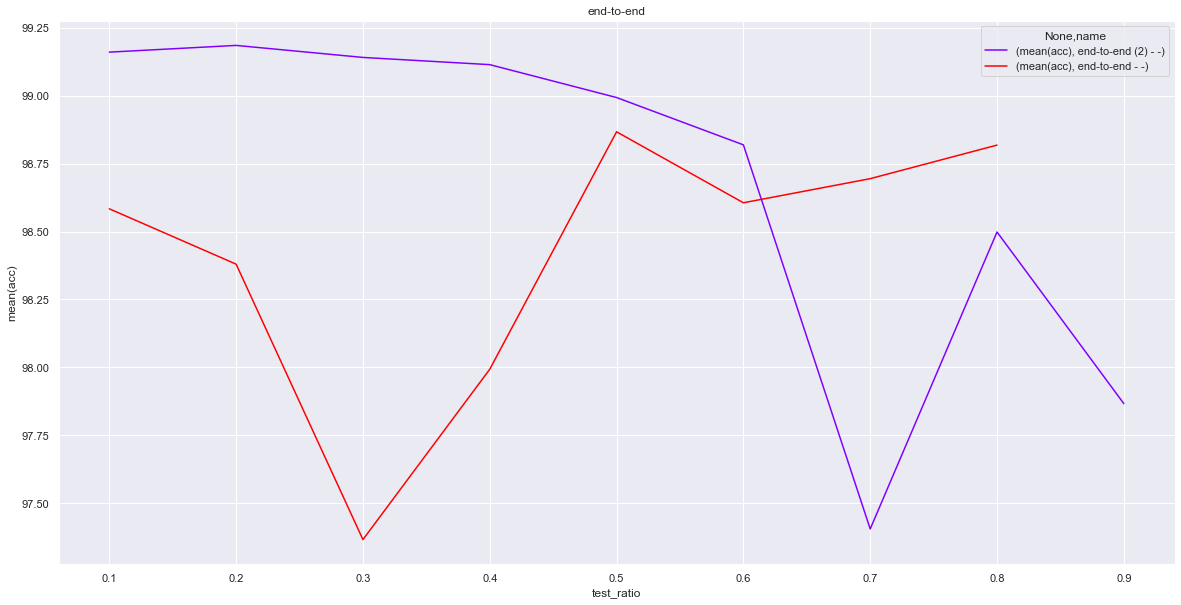

In [28]:
b = "mean(acc)"
a="end-to-end"


df2 = df_all_2[[b, "clasifier", "feature_type", "test_ratio"]]
df1 = df_all_1[["acc", "clasifier", "feature_type", "test_ratio"]]

df1.columns = [b, "clasifier", "feature_type", "test_ratio"]
# df1["mean(f1)"] = df1["mean(f1)"].map(lambda x: x*100)

df = df1.append(df2)
df["feature_type"] = df["feature_type"].map(lambda x: "image" if x=="image_PTI_FT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "custom CNN" if x=="resnet50_PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "vgg16" if x=="vgg16_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "efficientnet" if x=="efficientnet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "resnet50" if x=="resnet50_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "mobilene" if x=="mobilenet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end" if x=="PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end (2)" if x=="CD PTI P100_FS" else x)
df["clasifier"] = df["clasifier"].map(lambda x: "-" if x=="End-to-end" else x)

df["name"] = df["feature_type"] + " - " + df["clasifier"]#.map(lambda x: "-" if x=="End-to-end" else x)
df1 = df[df["clasifier"]=='-']
df1.drop(["clasifier", "feature_type"], axis=1)
dfg = df1.groupby(['test_ratio', 'name']).mean()
#plot()
# print(dfg)
sns.set()
sns.color_palette("Blues")
dfg.unstack().plot(figsize=(20,10), cmap="rainbow")
plt.title(a)
plt.ylabel(b)

In [88]:
a = glob.glob(r"C:\Project\master-project\results2\*_4.xlsx")
b = glob.glob(r"C:\Project\master-project\results2\*_5.xlsx")
df_all_1 = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a+b):

    e = pd.read_excel(i)
    # e["train_split"]=1-z[ind]
    df_all_1 = df_all_1.append(e)
df_all_1.drop("Unnamed: 0",  axis=1, inplace=True)
print(df_all_1.shape)
df_all_1.head()

a = glob.glob(r"C:\Project\master-project\results2\*_8.xlsx")
b = glob.glob(r"C:\Project\master-project\results2\*_9.xlsx")
c = glob.glob(r"C:\Project\master-project\results2\*_10.xlsx")
df_all_2 = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a+b+c):

    e = pd.read_excel(i)
    # e["train_split"]=1-z[ind]
    df_all_2 = df_all_2.append(e)
df_all_2.drop("Unnamed: 0",  axis=1, inplace=True)
print(df_all_2.shape)
df_all_2.head()


(1600, 229)
(6480, 219)


,testID,subject ID,direction,clasifier,PCA,num_pc,classifier_parameters,normilizing,feature_type,test_ratio,...,FRR_90,FRR_91,FRR_92,FRR_93,FRR_94,FRR_95,FRR_96,FRR_97,FRR_98,FRR_99
0,6169072,4,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
1,6169072,4,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
2,6169072,5,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
3,6169072,5,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
4,6169072,6,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1


C:\Users\skazemi1\AppData\Local\Temp/ipykernel_5060/2794923903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["mean(f1)"] = df1["mean(f1)"].map(lambda x: x*100)


Text(0, 0.5, 'f1-score(%)')

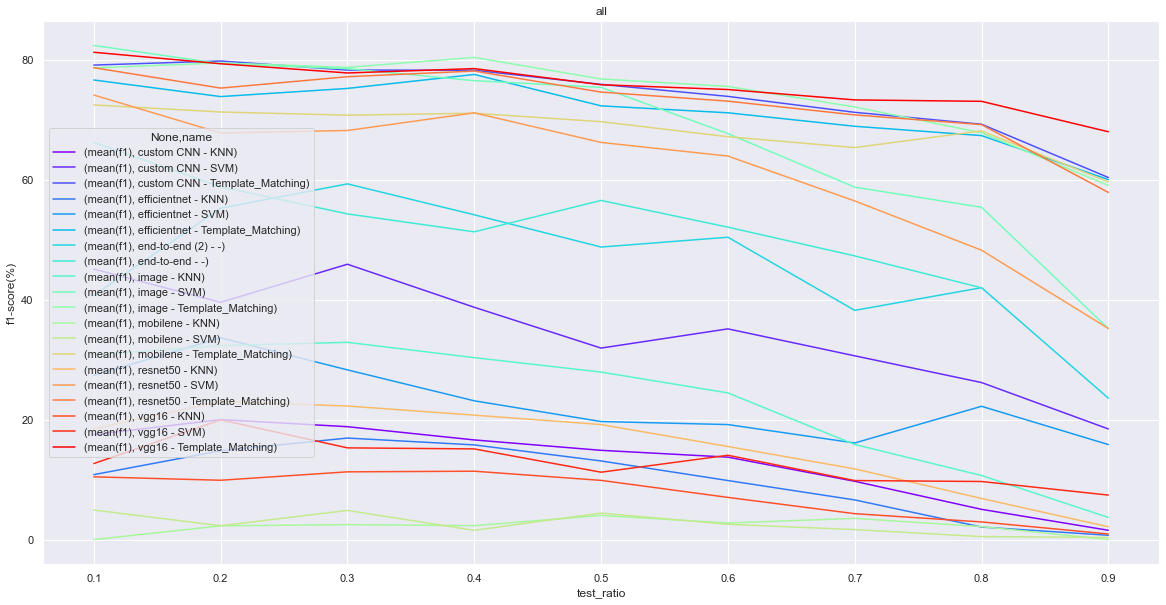

In [163]:
df2 = df_all_2[["mean(f1)", "clasifier", "feature_type", "test_ratio"]]
df1 = df_all_1[["f1score_test", "clasifier", "feature_type", "test_ratio"]]

df1.columns = ["mean(f1)", "clasifier", "feature_type", "test_ratio"]
df1["mean(f1)"] = df1["mean(f1)"].map(lambda x: x*100)

df = df1.append(df2)
df["feature_type"] = df["feature_type"].map(lambda x: "image" if x=="image_PTI_FT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "custom CNN" if x=="resnet50_PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "vgg16" if x=="vgg16_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "efficientnet" if x=="efficientnet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "resnet50" if x=="resnet50_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "mobilene" if x=="mobilenet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end" if x=="PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end (2)" if x=="CD PTI P100_FS" else x)
df["clasifier"] = df["clasifier"].map(lambda x: "-" if x=="End-to-end" else x)

df["name"] = df["feature_type"] + " - " + df["clasifier"]#.map(lambda x: "-" if x=="End-to-end" else x)
a="all"
df1 = df#[df["clasifier"]=="-"]
df1.drop(["clasifier", "feature_type"], axis=1)
dfg = df1.groupby(['test_ratio', 'name']).mean()
#plot()
# print(dfg)
sns.set()
sns.color_palette("Blues")
dfg.unstack().plot(figsize=(20,10), cmap="rainbow")
plt.title(a)
plt.ylabel("f1-score(%)")

#p', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
# 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
# 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1',
# 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
# 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
# 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
# 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
#  'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 
# 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 
# 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
# summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
# 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [47]:
a = glob.glob(r"C:\Project\master-project\results\8*.xlsx")
df_all = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a):

    e = pd.read_excel(i)
    # e["train_split"]=1-z[ind]
    df_all = df_all.append(e)
df_all.drop("Unnamed: 0",  axis=1, inplace=True)
df_all.head()

,testID,subject ID,direction,clasifier,PCA,num_pc,classifier_parameters,normilizing,feature_type,test_ratio,...,FRR_90,FRR_91,FRR_92,FRR_93,FRR_94,FRR_95,FRR_96,FRR_97,FRR_98,FRR_99
0,6169072,4,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
1,6169072,4,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
2,6169072,5,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
3,6169072,5,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
4,6169072,6,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1


In [46]:
df_all


,testID,subject ID,direction,clasifier,PCA,num_pc,classifier_parameters,normilizing,feature_type,test_ratio,...,FRR_90,FRR_91,FRR_92,FRR_93,FRR_94,FRR_95,FRR_96,FRR_97,FRR_98,FRR_99
0,6169072,4,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
1,6169072,4,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
2,6169072,5,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
3,6169072,5,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
4,6169072,6,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,6169072,21,right_1,SVM,0.95,26,"{'kernel': 'linear', 'random_runs': 50, 'verbo...",z-score,resnet50_PTI_PT,0.9,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
36,6169072,22,left_0,SVM,0.95,27,"{'kernel': 'linear', 'random_runs': 50, 'verbo...",z-score,resnet50_PTI_PT,0.9,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
37,6169072,22,right_1,SVM,0.95,27,"{'kernel': 'linear', 'random_runs': 50, 'verbo...",z-score,resnet50_PTI_PT,0.9,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
38,6169072,24,left_0,SVM,0.95,25,"{'kernel': 'linear', 'random_runs': 50, 'verbo...",z-score,resnet50_PTI_PT,0.9,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


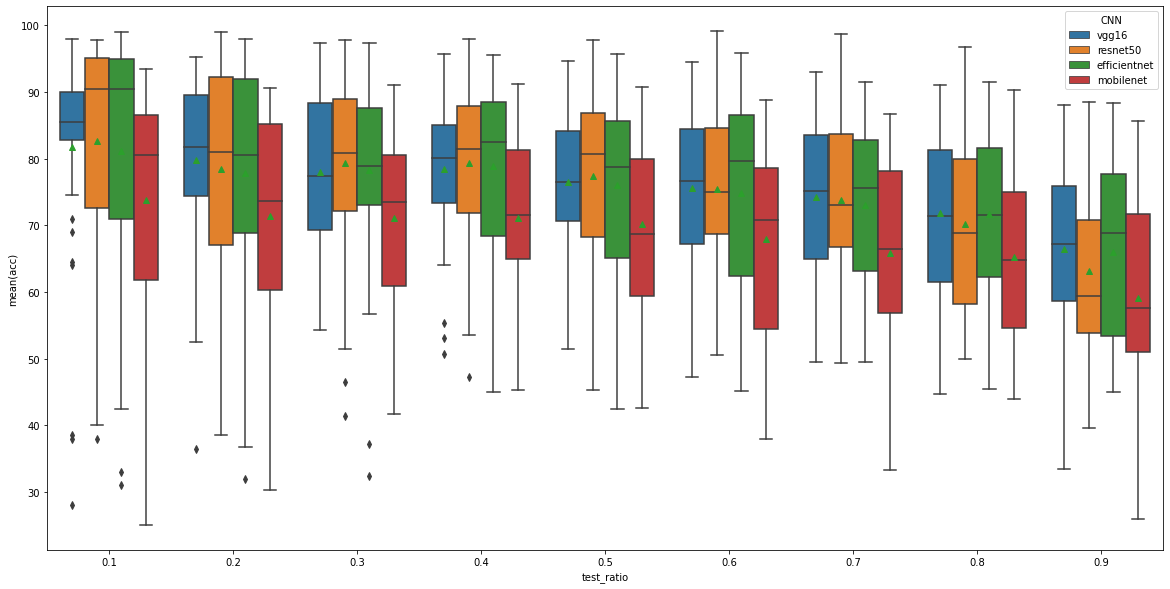

In [55]:
data = df_all
data["CNN"] = data["feature_type"].map(lambda x: x.split("_")[0] )
# data["image_feature"] = data["feature_type"].map(lambda x: x.split("_")[1] )
data = data[data["clasifier"]=="Template_Matching"]
y = "f1score_test"
y = "mean(acc)"

x = "test_ratio"# train_split test_ratio"
hue = "CNN"
box_pairs=[
    (0.1, 0.2),
    (0.1, 0.3),
    (0.7, 0.6),
    (0.9, 0.8),
    (0.7, 0.8),
    ]

plt.figure(figsize=(20,10))
# plt.title(data.iloc[1, 3])
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)

# add_stat_annotation(ax, data=data, y=y, x=x, 
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [6]:
a = glob.glob(r"C:\Users\skazemi1\Desktop\e1\*.xlsx")
df_all = pd.DataFrame()
z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a):

    e = pd.read_excel(i)
    e["train_split"]=1-z[ind]
    df_all = df_all.append(e)
df_all

,Unnamed: 0,testID,subject ID,direction,clasifier,f1score_test,f1score_train,f1score_val,classifier_parameters,feature_type,test_ratio,val_ratio,train,val,test,save_path,tensorboard,train_split
0,0,8897,0,Both,End-to-end,0.235294,0.333333,0.470588,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.4248168468475342, 'tp': 16.0, 'fp':...","{'loss': 0.43575388193130493, 'tp': 4.0, 'fp':...","{'loss': 0.4244650900363922, 'tp': 2.0, 'fp': ...",./results/deep_model/FS_PTI_0.1/22838820_0_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
1,1,8912,1,Both,End-to-end,0.571429,0.615385,0.666667,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.24983572959899902, 'tp': 16.0, 'fp'...","{'loss': 0.24928255379199982, 'tp': 5.0, 'fp':...","{'loss': 0.24688629806041718, 'tp': 2.0, 'fp':...",./results/deep_model/FS_PTI_0.1/22838820_1_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
2,2,8888,2,Both,End-to-end,1.000000,0.875000,0.842105,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.06543152034282684, 'tp': 28.0, 'fp'...","{'loss': 0.11185712367296219, 'tp': 8.0, 'fp':...","{'loss': 0.05873316153883934, 'tp': 5.0, 'fp':...",./results/deep_model/FS_PTI_0.1/22838820_2_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
3,3,9029,3,Both,End-to-end,0.545455,0.740741,0.555556,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.07520745694637299, 'tp': 20.0, 'fp'...","{'loss': 0.08915271610021591, 'tp': 5.0, 'fp':...","{'loss': 0.1000903770327568, 'tp': 3.0, 'fp': ...",./results/deep_model/FS_PTI_0.1/22838820_3_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
4,4,9900,4,Both,End-to-end,0.285714,0.461538,0.333333,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.11620134860277176, 'tp': 18.0, 'fp'...","{'loss': 0.14253145456314087, 'tp': 4.0, 'fp':...","{'loss': 0.1213371679186821, 'tp': 2.0, 'fp': ...",./results/deep_model/FS_PTI_0.1/22838820_4_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,8888,15,Both,End-to-end,0.333333,0.461538,0.133333,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.5114799737930298, 'tp': 3.0, 'fp': ...","{'loss': 0.5157889127731323, 'tp': 1.0, 'fp': ...","{'loss': 0.5000433921813965, 'tp': 1.0, 'fp': ...",./results/deep_model/FS_PTI_0.8/22838820_15_be...,/project/6010852/saeed67/master-project/logs/T...,0.2
16,16,8897,16,Both,End-to-end,0.037037,0.037559,0.028674,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.7413118481636047, 'tp': 4.0, 'fp': ...","{'loss': 0.7430834770202637, 'tp': 4.0, 'fp': ...","{'loss': 0.7436287999153137, 'tp': 3.0, 'fp': ...",./results/deep_model/FS_PTI_0.8/22838820_16_be...,/project/6010852/saeed67/master-project/logs/T...,0.2
17,17,8913,17,Both,End-to-end,0.142857,0.064516,0.153846,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.6863580346107483, 'tp': 1.0, 'fp': ...","{'loss': 0.6884788274765015, 'tp': 3.0, 'fp': ...","{'loss': 0.6869836449623108, 'tp': 1.0, 'fp': ...",./results/deep_model/FS_PTI_0.8/22838820_17_be...,/project/6010852/saeed67/master-project/logs/T...,0.2
18,18,7623,18,Both,End-to-end,0.041958,0.037736,0.038168,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.7999887466430664, 'tp': 4.0, 'fp': ...","{'loss': 0.8035144209861755, 'tp': 5.0, 'fp': ...","{'loss': 0.7747525572776794, 'tp': 3.0, 'fp': ...",./results/deep_model/FS_PTI_0.8/22838820_18_be...,/project/6010852/saeed67/master-project/logs/T...,0.2


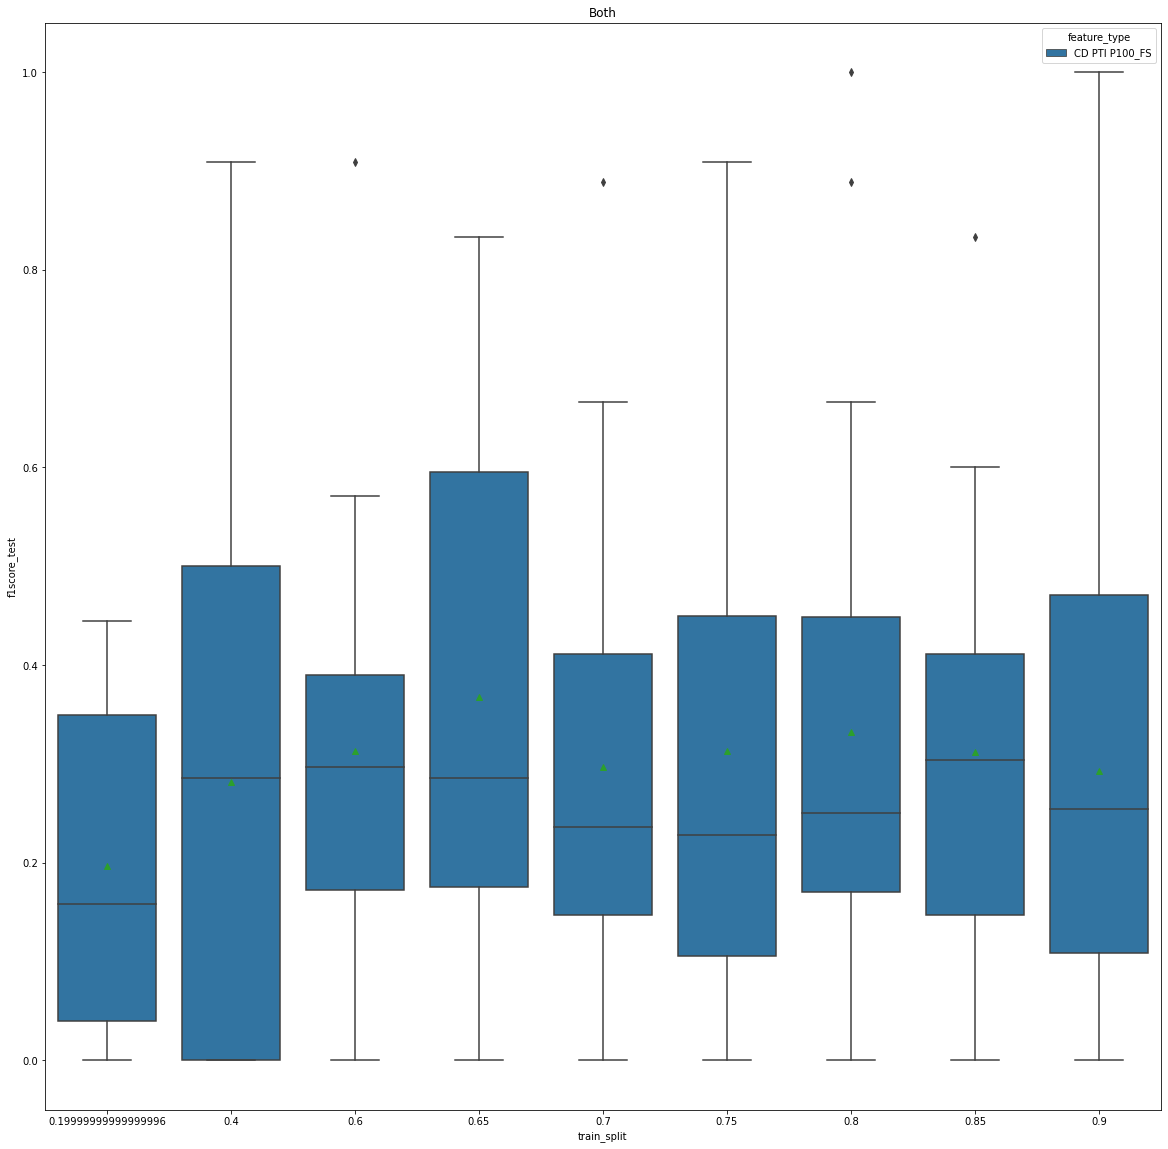

In [7]:

data = df_all
# data["CNN"] = data["feature_type"].map(lambda x: x.split("_")[0] )
# data["image_feature"] = data["feature_type"].map(lambda x: x.split("_")[1] )

y = "f1score_train"
y = "f1score_test"

x = "test_ratio"
x = "train_split"
hue = "feature_type"
# box_pairs=[
#     (("resnet50", "P100"), ("resnet50", "P90")),
#     ]

plt.figure(figsize=(20,20))
plt.title(data.iloc[1, 3])
ax = sns.boxplot(data=data, y=y, hue=hue, x=x, showmeans=True,)

# add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [2]:
e1 = pd.read_excel(r"C:\Project\master-project\results\Result_all_4168.xlsx")
e2 = pd.read_excel(r"C:\Project\master-project\results\Result_all_15312.xlsx")
e1.drop("Unnamed: 0",  axis=1, inplace=True)
e2.drop("Unnamed: 0",  axis=1, inplace=True)
#e = pd.concat((e1, e2, e3), axis=0)
print(e1.shape)
#print(e.shape)
#e["CNN"] = e["feature_type"].map(lambda x: x.split("-")[0] )
#e["image_feature"] = e["feature_type"].map(lambda x: x.split("-")[1] )
#e.to_excel(r"C:\Project\master-project\results\Result_all.xlsx")


(128, 219)


In [ ]:
e1 = pd.read_excel(r"C:\Users\skazemi1\Desktop\1_a1.xlsx")
e1.drop("Unnamed: 0",  axis=1, inplace=True)
print(e1.shape)
e1

(120, 16)


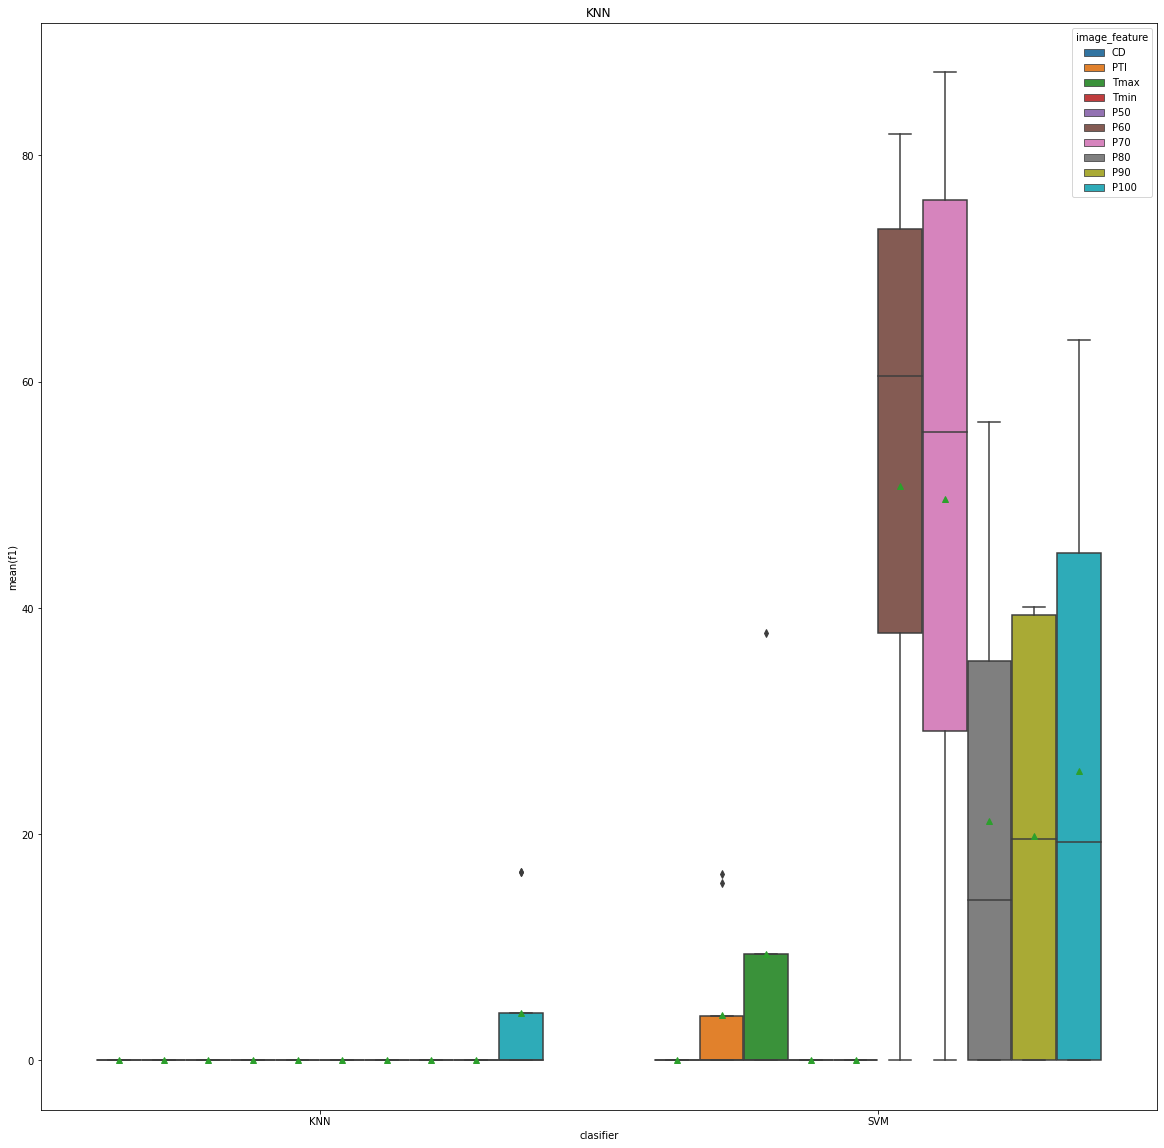

In [14]:
data = e1
data["CNN"] = data["feature_type"].map(lambda x: x.split("_")[0] )
data["image_feature"] = data["feature_type"].map(lambda x: x.split("_")[1] )

y = "mean(acc)"
y = "mean(f1)"

x = "clasifier"
hue = "image_feature"
# box_pairs=[
#     (("resnet50", "P100"), ("resnet50", "P90")),
#     ]

plt.figure(figsize=(20,20))
plt.title(data.iloc[1, 3])
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)

# add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [15]:
e1 = pd.read_excel(r"C:\Project\master-project\good\Result_all_101005.xlsx")
e2 = pd.read_excel(r"C:\Project\master-project\good\Result_all_101006.xlsx")
e3 = pd.read_excel(r"C:\Project\master-project\good\Result_all_101040.xlsx")
e1.drop("Unnamed: 0",  axis=1, inplace=True)
e2.drop("Unnamed: 0",  axis=1, inplace=True)
e3.drop("Unnamed: 0",  axis=1, inplace=True)
#e = pd.concat((e1, e2, e3), axis=0)
print(e1.shape)
#print(e.shape)
#e["CNN"] = e["feature_type"].map(lambda x: x.split("-")[0] )
#e["image_feature"] = e["feature_type"].map(lambda x: x.split("-")[1] )
#e.to_excel(r"C:\Project\master-project\results\Result_all.xlsx")


(9600, 219)


Text(0.5, 0, ' ')

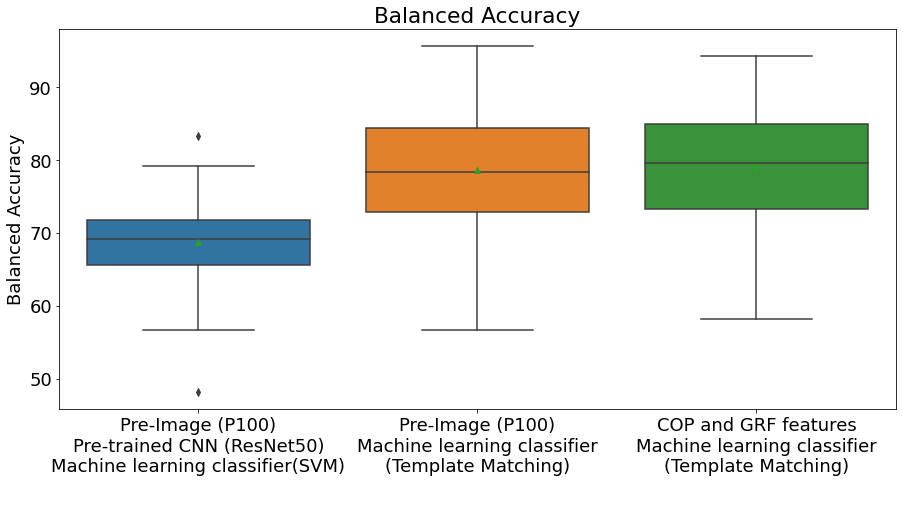

In [34]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

from statannot import add_stat_annotation
e3 = pd.read_excel(f'C:\\Project\\master-project\\results\\results.xlsx')
data = e3

# data["CNN"] = data["feature_type"].map(lambda x: x.split("-")[0] )
data["feature_type"] = data["feature_type"].map(lambda x: "Pre-Image (P100)\nPre-trained CNN (ResNet50)\nMachine learning classifier(SVM)" if  x =="PT_deep_P100_resnet50" else x)
data["feature_type"] = data["feature_type"].map(lambda x: "Pre-Image (P100)\nMachine learning classifier\n(Template Matching)" if  x =="image_P100" else x)
data["feature_type"] = data["feature_type"].map(lambda x: "COP and GRF features\nMachine learning classifier\n(Template Matching)" if  x =="all" else x)

y = "BACC_bd"
# y = "mean(f1)"

x = "CNN"
x = "feature_type"
# box_pairs=[
#     (("image", "P100"), ("image", "P90")),
#     ]

plt.figure(figsize=(15,7))
plt.title("Balanced Accuracy")
plt.ylabel("Three pipelines")

ax = sns.boxplot(data=data, y=y,  x=x, showmeans=True,)
plt.ylabel("Balanced Accuracy")
plt.xlabel(" ")
# # add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
# #                     box_pairs=box_pairs,
# #                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [50]:
pre_image_names = ["CD", "PTI", "Tmin", "Tmax", "P50", "P60", "P70", "P80", "P90", "P100"]
pre_image_name ="CD"
if not pre_image_name in pre_image_names:
    raise Exception("invalid pre image name!!!")

exec(f"A_{pre_image_name} = pd.DataFrame([[1,2,3,4]], columns=['pixel_'+str(i) for i in range(4)]) ")
A_CD

,pixel_0,pixel_1,pixel_2,pixel_3
0,1,2,3,4


In [21]:
feat = "aaa"
columnsName = [feat+"_PC"+str(i) for i in list(range(1, 3+1))]
columnsName

['aaa_PC1', 'aaa_PC2', 'aaa_PC3']

<AxesSubplot:xlabel='features'>

<Figure size 1440x1440 with 0 Axes>

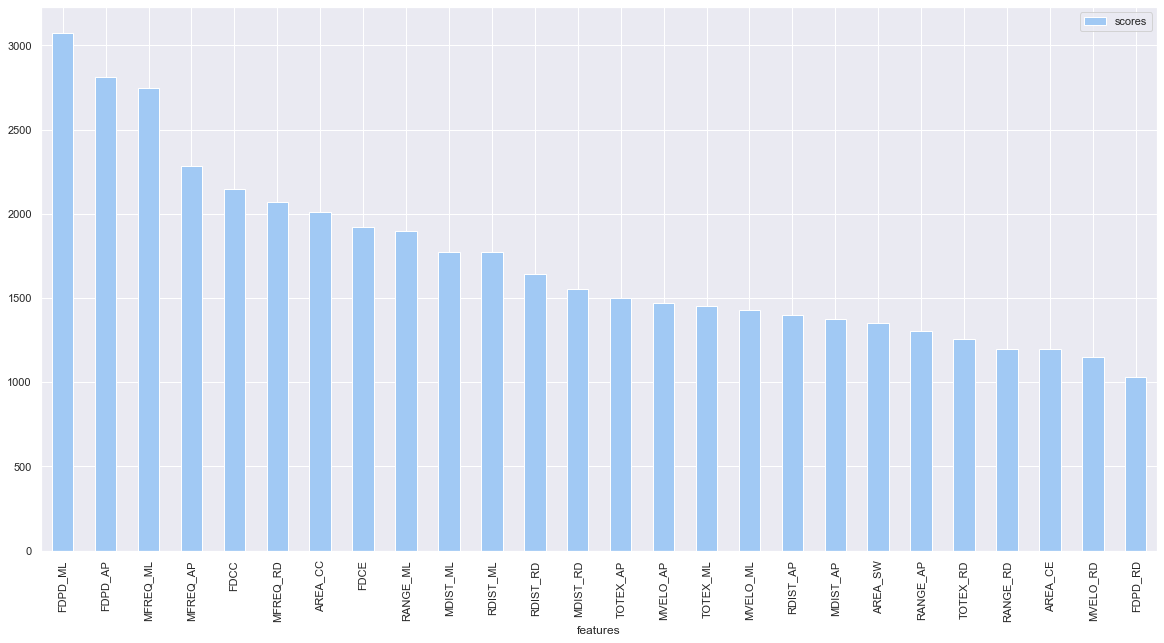

In [176]:
working_path = os.getcwd()
DF = pd.read_excel(os.path.join(working_path[:-5], "temp", "DF1.xlsx"))
DF.columns=["Rank", "D-prime", "F-ratio", "mRMR-Dif", "mRMR-Q", "Redundancy", "ID"]
DF

<AxesSubplot:xlabel='Count', ylabel='Redundancy'>

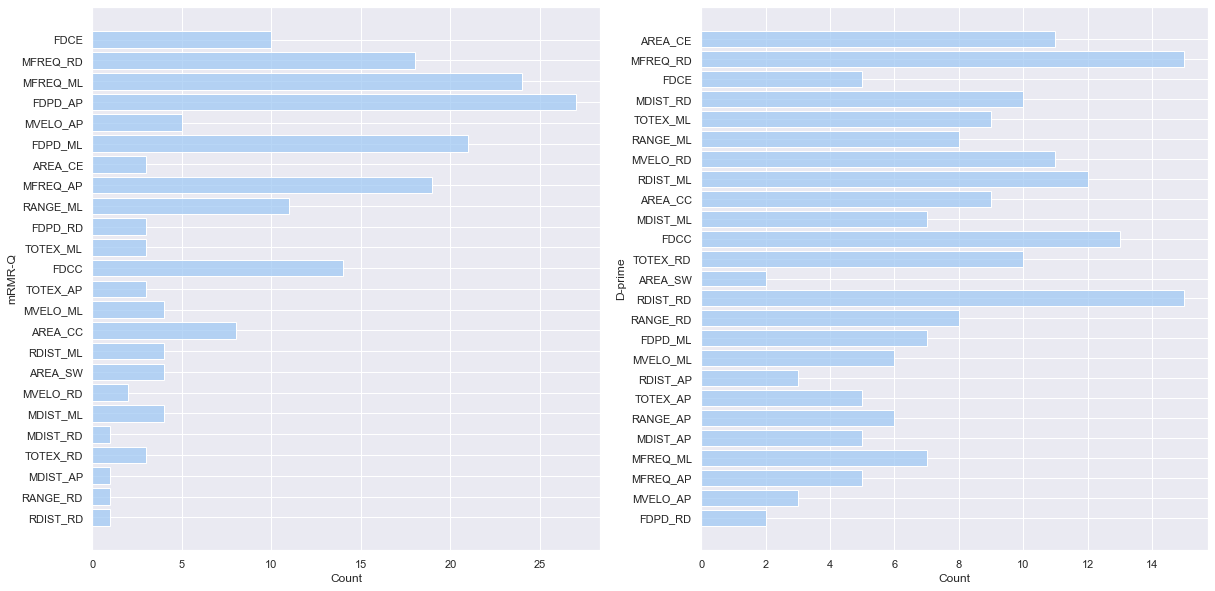

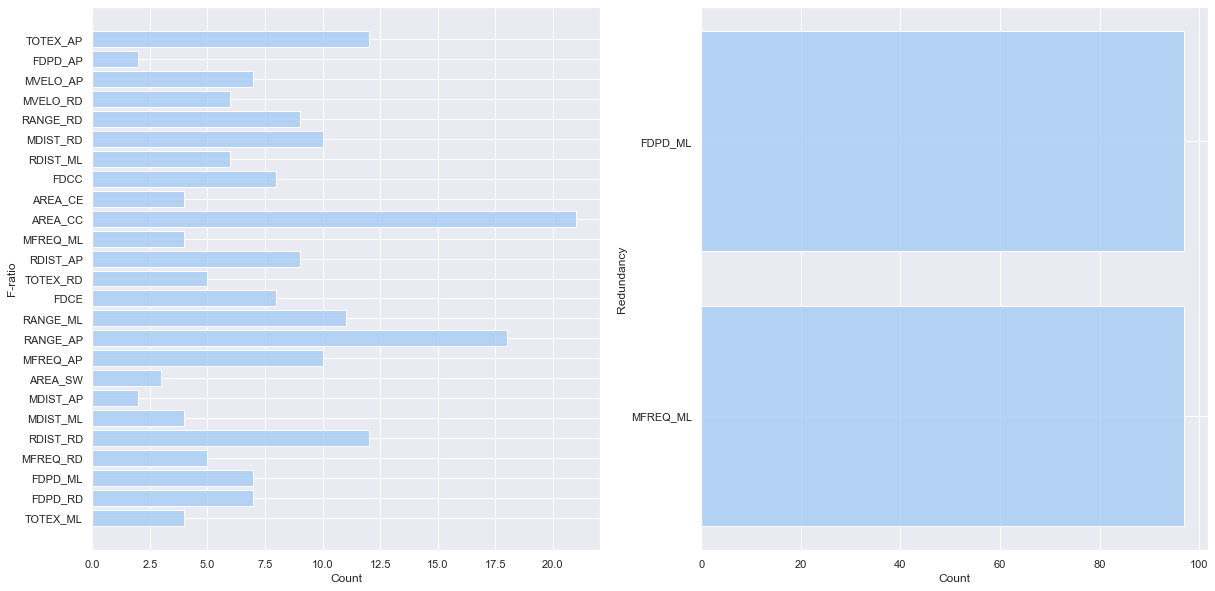

In [177]:
a = DF[ DF["Rank"]==1 ]
sns.set_palette("pastel")
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.histplot(data=a, y="mRMR-Q", stat="count", bins=26, shrink=.8, label="mRMR", legend=True)
plt.subplot(1,2,2)
sns.histplot(data=a, y="D-prime", stat="count", bins=26, shrink=.8, label="D-prime", legend=True)
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
sns.histplot(data=a, y="F-ratio", stat="count", bins=26, shrink=.8, label="F-ratio", legend=True)
plt.subplot(1,2,2)
sns.histplot(data=a, y="Redundancy", stat="count", bins=26, shrink=.8, label="Redundancy", legend=True)
# plt.legend(loc="best")



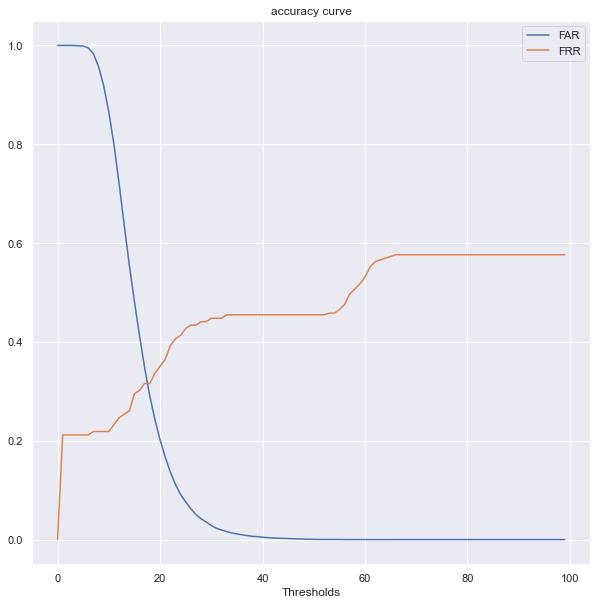

In [70]:
DD = pd.read_excel(os.path.join(working_path[:-5], "Archive", "results on testsize", "DF.xlsx"))
DD = DD[ DD["Test_Size"]== 0.9 ]
DD = DD[ DD["Mode"] == "dist"]
DD = DD.iloc[:, 26:].mean(axis=0)
a = ["FAR_L_"+str(i) for i in range(100)]
b = ["FRR_L_"+str(i) for i in range(100)]
sns.set()
plt.figure(figsize=(10,10))
plt.plot([i for i in range(100)], DD.loc[a], label="FAR")
plt.plot([i for i in range(100)], DD.loc[b], label="FRR")
plt.title("accuracy curve")
plt.xlabel("Thresholds")
plt.legend(loc="best")



     sub        acc   f1-score Normalization method
0      5  90.200000  91.484848              z-score
1      6  90.600000  92.081252              z-score
2      7  92.500000  93.296703              z-score
3      8  82.666667  86.261905              z-score
4      9  92.500000  93.644444              z-score
..   ...        ...        ...                  ...
762  100  84.000000  87.047619              z-score
763  101  79.250000  79.219048              z-score
764   94  67.000000  70.238961              z-score
765  102  70.333333  70.057143              z-score
766  103  78.250000  80.523478              z-score

[767 rows x 4 columns]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

z-score v.s. Minmax: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.652e-03 U_stat=8.159e+04


(<AxesSubplot:xlabel='Normalization method', ylabel='f1-score'>,
 [<statannot.StatResult.StatResult at 0x16b46951e20>])

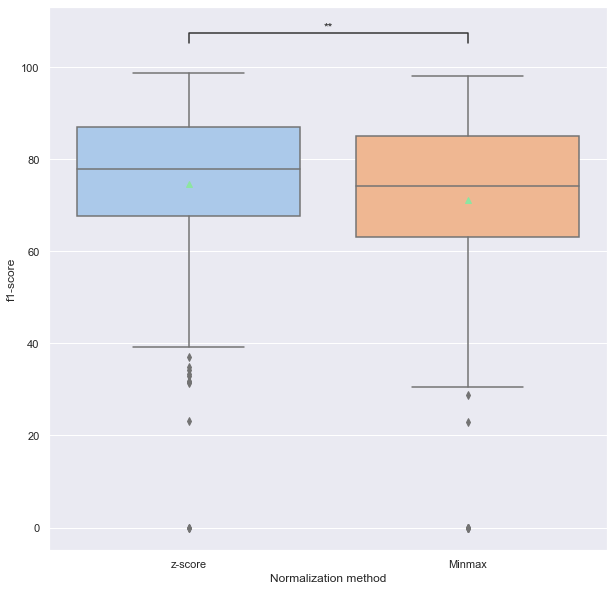

In [208]:
from statannot import add_stat_annotation

folder1 = "1.0_z-score_All_corr_min_0.0_None_2"
path = os.path.join(working_path[:-5], "Archive", "results on testsize", "DF1.xlsx")
Results_DF_1 = pd.read_excel(path, )
Results_DF_1.columns=["sub", "acc", "f1-score", "Normalization method"]
# Results_DF_1 = Results_DF_1[ Results_DF_1["feature type"] == "COP"]
print(Results_DF_1)

x = "Normalization method"
y = "acc"
y = "f1-score"
box_pairs=[

    ("Minmax", "z-score"),

    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=Results_DF_1, y=y,  x=x, showmeans=True,)
add_stat_annotation(ax, data=Results_DF_1, y=y, x=x,  
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.16))

In [240]:
import glob
path = os.path.join(working_path[:-5], "Archive", "results WS3", "pfeatures", "**", "*.xlsx")
df_all = pd.DataFrame()
for i in glob.glob(path):
    df = pd.read_excel(i, index_col = 0)
    foldername = i.split("\\")[-2]
    # print(foldername.split("_"))
    df["Normalization method"] = foldername.split("_")[1]
    df["Criteria"] = foldername.split("_")[4]
    df["PCA"] = foldername.split("_")[0]
    # print(df)
    # sys.exit()
    df_all = df_all.append(df)

df_all

,subject ID,mean(acc),mean(f1),mean(eer),# positive samples training,# positive samples test,# negative samples test,test_ratio,EER,t_idx,...,FRR_93,FRR_94,FRR_95,FRR_96,FRR_97,FRR_98,FRR_99,Normalization method,Criteria,PCA
0,4,53.600000,46.924387,0.464000,11,5,411,0.3,0.355455,75,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
1,5,81.200000,81.478788,0.188000,13,5,410,0.3,0.173846,78,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
2,6,84.200000,87.092241,0.158000,12,5,410,0.3,0.281667,76,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
3,7,74.666667,72.947319,0.253333,14,6,410,0.3,0.135714,72,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
4,8,48.666667,40.514286,0.513333,8,3,412,0.3,0.305000,73,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,100,83.333333,86.809524,0.166667,8,3,436,0.3,0.388750,26,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0
92,101,75.750000,76.457143,0.242500,9,4,436,0.3,0.224444,25,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0
93,94,80.250000,84.501010,0.197500,11,4,435,0.3,0.392727,22,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0
94,102,68.666667,68.952381,0.313333,7,3,437,0.3,0.181429,25,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0


['0.8' '0.95' '0.9' '1.0']
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

median v.s. min: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.309e-17 U_stat=9.705e+05
average v.s. median: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.275e-03 U_stat=1.266e+06
average v.s. min: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.933e-06 U_stat=1.062e+06


(<AxesSubplot:xlabel='Criteria', ylabel='mean(acc)'>,
  <statannot.StatResult.StatResult at 0x16b4aba07f0>])

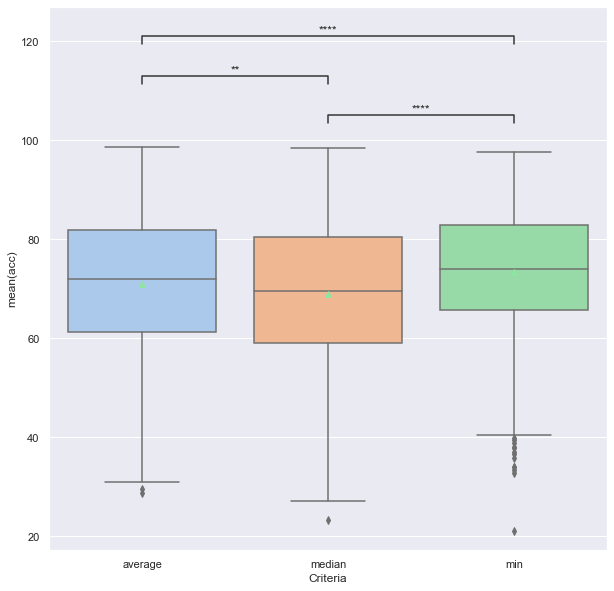

In [249]:

print(df_all["PCA"].unique())
x = "Normalization method"
x = "Criteria"
# x = "PCA"
y = "mean(acc)"
# y = "mean(f1)"
box_pairs=[

    # ("minmax", "z-score"),

    ("min", "average"),
    ("min", "median"),
    ("median", "average"),

    # ("1.0", "0.95"),
    # ("1.0", "0.9"),
    # ("1.0", "0.8"),
    # ("0.95", '0.9'),
    # ("0.95", "0.8"),
    # ("0.9", "0.8"),
    
    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_all, y=y,  x=x, showmeans=True,)
add_stat_annotation(ax, data=df_all, y=y, x=x,  
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

In [ ]:
import glob
path = os.path.join(working_path[:-5], "Archive", "results WS1", "pfeatures", "**", "*.xlsx")
df_all = pd.DataFrame()
for i in glob.glob(path):
    df = pd.read_excel(i, index_col = 0)
    foldername = i.split("\\")[-2]
    # print(foldername.split("_"))
    df["feature name"] = foldername.split("_")[2]
    df["Matching Score​​"] = foldername.split("_")[3]
    # print(df)
    # sys.exit()
    df_all = df_all.append(df)



In [273]:
import glob
path = os.path.join(working_path[:-5], "Archive", "results WS1", "afeatures-simple", "**", "*.xlsx")
df_all_a = pd.DataFrame()
for i in glob.glob(path):
    df = pd.read_excel(i, index_col = 0)
    foldername = i.split("\\")[-2]
    # print(foldername.split("_"))
    df["feature name"] = foldername.split("_")[2]
    df["Matching Score​​"] = foldername.split("_")[3]
    # print(df)
    # sys.exit()
    df_all_a = df_all_a.append(df)



p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

RANGE_corr v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.020e-51 U_stat=3.502e+04
RANGE_dist v.s. RDIST_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.168e-03 U_stat=1.466e+04
RANGE_dist v.s. TOTEX_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.743e+04
MFREQ_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.977e-22 U_stat=2.907e+04
MDIST_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.814e-08 U_stat=2.480e+04
All_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.124e-01 U_stat=2.099e+04


(<AxesSubplot:xlabel='feature name', ylabel='EER'>,
  <statannot.StatResult.StatResult at 0x16b51275cd0>])

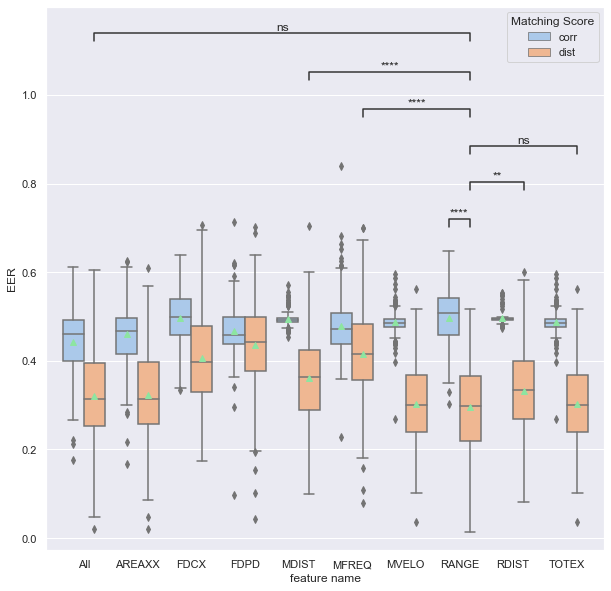

In [278]:

data = df_all
hue = 'Matching Score​​'
x = 'feature name'
y = 'EER'
box_pairs=[

    (('RANGE','dist'),('RANGE', 'corr')),
    (('RANGE','dist'),('All', 'dist')),
    (('RANGE','dist'),('TOTEX', 'dist')),
    (('RANGE','dist'),('RDIST', 'dist')),
    (('RANGE','dist'),('MFREQ', 'dist')),
    (('RANGE','dist'),('MDIST', 'dist')),

    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)
add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

RANGE_corr v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.450e-53 U_stat=3.519e+04
RANGE_dist v.s. RDIST_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.238e-02 U_stat=1.558e+04
RANGE_dist v.s. TOTEX_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.750e+04
MFREQ_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.683e-16 U_stat=2.753e+04
MDIST_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.735e-06 U_stat=2.373e+04
All_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.285e-01 U_stat=2.052e+04


(<AxesSubplot:xlabel='feature name', ylabel='EER'>,
  <statannot.StatResult.StatResult at 0x16b53643580>])

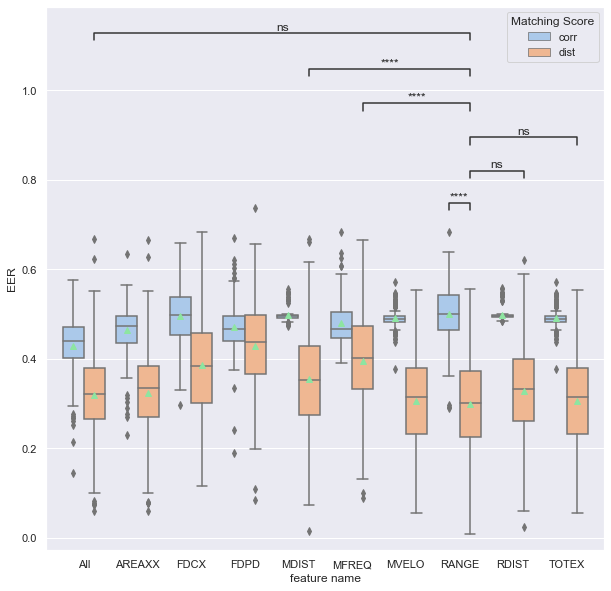

In [279]:
data = df_all_a
hue = 'Matching Score​​'
x = 'feature name'
y = 'EER'
box_pairs=[

    (('RANGE','dist'),('RANGE', 'corr')),
    (('RANGE','dist'),('All', 'dist')),
    (('RANGE','dist'),('TOTEX', 'dist')),
    (('RANGE','dist'),('RDIST', 'dist')),
    (('RANGE','dist'),('MFREQ', 'dist')),
    (('RANGE','dist'),('MDIST', 'dist')),

    
    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)
add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SVM_mobilenet v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.308e-02 U_stat=1.548e+04
SVM_vgg16 v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.816e+04
SVM_efficientnet v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.020e-02 U_stat=1.530e+04
SVM_inception_v3 v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.490e-06 U_stat=1.286e+04
SVM_resnet50 v.s. Template_Matching_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.246e-02 U_stat=2.152e+04


(<AxesSubplot:xlabel='clasifier', ylabel='mean(acc)'>,
  <statannot.StatResult.StatResult at 0x270c8482fd0>])

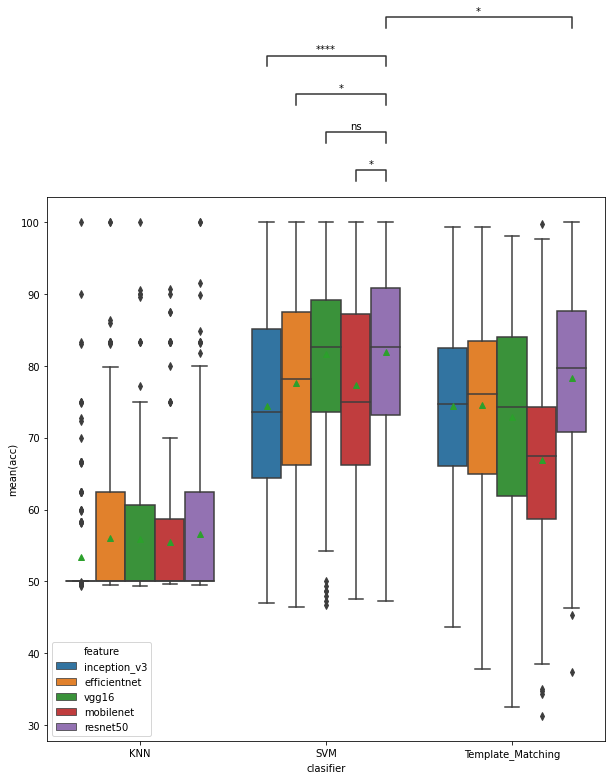

In [48]:
working_path = os.getcwd()

path = os.path.join(working_path[:-5], "Results.xlsx")

df = pd.read_excel(path, index_col = 0)


data = df
hue = "feature"
x = "clasifier"
y = "mean(acc)"
# ["knn_classifier", "svm_classifier", "Template_Matching_classifier"]
# space1=["vgg16.VGG16", "resnet50.ResNet50", "efficientnet.EfficientNetB0"]
box_pairs=[

    # (('Template_Matching','vgg16'),('SVM', 'vgg16')),
    (('Template_Matching','resnet50'),('SVM', 'resnet50')),
    # (('Template_Matching','mobilenet'),('SVM', 'mobilenet')),
    # (('Template_Matching','inception_v3'),('SVM', 'inception_v3')),
    # (('Template_Matching','efficientnet'),('SVM', 'efficientnet')),
    (('SVM','resnet50'),('SVM', 'inception_v3')),
    (('SVM','resnet50'),('SVM', 'efficientnet')),
    (('SVM','resnet50'),('SVM', 'mobilenet')),
    (('SVM','resnet50'),('SVM', 'vgg16')),
    ]

plt.figure(figsize=(10,10))
# g = sns.catplot(x=x, y=y,
#                  col=hue,
#                 data=data, kind="box",
#                 height=4, aspect=.7)
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)
add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [34]:
(df["feature_type"].unique())
(df["clasifier"].unique())
# df.columns[:20]

array(['KNN', 'SVM', 'Template_Matching'], dtype=object)